![example](images/director_shot.jpeg)

![example](images/movie_data_erd.jpeg)

# Project Title

**Authors:** Victor Kang
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [3]:
# Here you run your code to explore the data
conn = sqlite3.connect("zippedData/im.db")

In [4]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
pd.read_sql("""
SELECT *
FROM movie_basics
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings USING(movie_id)
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [7]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings USING(movie_id)
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller",7.0,284547.0
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy",6.3,169840.0
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",7.4,428142.0
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical",5.9,69910.0
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi",7.0,453966.0
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News",6.7,94.0
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi",7.9,546284.0
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama",NaN,NaN
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy",5.5,154345.0
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller",7.4,311704.0


In [9]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller"
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy"
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical"
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi"
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News"
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi"
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama"
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy"
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller"


In [10]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE movie_id IN 
    (SELECT movie_id
    FROM principals
    WHERE person_id = "nm0000129")
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0790724,Jack Reacher,Jack Reacher,2012,130.0,"Action,Crime,Thriller"
1,tt1013743,Knight and Day,Knight and Day,2010,109.0,"Action,Adventure,Comedy"
2,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"
3,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical"
4,tt1483013,Oblivion,Oblivion,2013,124.0,"Action,Adventure,Sci-Fi"
5,tt1592191,"Sex, Drugs & Religion","Sex, Drugs & Religion",2010,72.0,"Comedy,Documentary,News"
6,tt1631867,Edge of Tomorrow,Edge of Tomorrow,2014,113.0,"Action,Sci-Fi"
7,tt1745960,Top Gun: Maverick,Top Gun: Maverick,2020,NaN,"Action,Drama"
8,tt2345759,The Mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy"
9,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.0,"Action,Adventure,Thriller"


In [11]:
pd.read_sql("""
SELECT *
FROM persons;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [674]:
principals = pd.read_sql("""
SELECT *
FROM principals;
""", conn)

In [12]:
cruiseknownfor = pd.read_sql("""
SELECT *
FROM known_for
WHERE person_id = "nm0000129";
""", conn)

In [13]:
cruiseknownfor["movie_id"]

0    tt0325710
1    tt0116695
2    tt0092099
3    tt0181689
Name: movie_id, dtype: object

In [14]:
pd.read_sql("""
SELECT *
FROM known_for
WHERE movie_id = "tt0325710";
""", conn)

,person_id,movie_id
0,nm0298020,tt0325710
1,nm0694249,tt0325710
2,nm1037158,tt0325710
3,nm0001799,tt0325710
4,nm0407033,tt0325710
5,nm0813414,tt0325710
6,nm0846104,tt0325710
7,nm0153610,tt0325710
8,nm0913822,tt0325710
9,nm0238848,tt0325710


In [15]:
pd.read_sql("""
SELECT *
FROM principals
WHERE person_id = "nm0000129";
""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt1592191,2,nm0000129,self,None,"[""Himself""]"
1,tt1631867,1,nm0000129,actor,None,"[""Cage""]"
2,tt1336608,3,nm0000129,actor,None,"[""Stacee Jaxx""]"
3,tt1483013,1,nm0000129,actor,None,"[""Jack""]"
4,tt1745960,1,nm0000129,actor,None,"[""Maverick""]"
5,tt0790724,1,nm0000129,actor,None,"[""Reacher""]"
6,tt1013743,1,nm0000129,actor,None,"[""Roy Miller""]"
7,tt1229238,1,nm0000129,actor,None,"[""Ethan Hunt""]"
8,tt2345759,1,nm0000129,actor,None,"[""Nick Morton""]"
9,tt3532216,1,nm0000129,actor,None,"[""Barry Seal""]"


In [16]:
pd.read_sql("""
SELECT *
FROM writers
WHERE person_id = "nm0000129";
""", conn)

,movie_id,person_id


In [17]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE "%cruise%";
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0000129,Tom Cruise,1962.0,None,"actor,producer,soundtrack"
1,nm1652557,Sarah Cruise,NaN,None,"editor,editorial_department,writer"
2,nm2277678,Sharon LaCruise,NaN,None,"producer,director,writer"
3,nm3595972,Zee Cruise,NaN,None,actress
4,nm6980584,Brit Cruise,NaN,None,"producer,director,writer"
5,nm6081001,Carter Cruise,1991.0,None,actress
6,nm8660016,Marc Cruise,NaN,None,director
7,nm9844470,Joachim Cruise,NaN,None,actor
8,nm9640296,Cruise Sztamenits,NaN,None,"camera_department,cinematographer"
9,nm7775247,Mike Cruise,NaN,None,None


In [18]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE "%jackman%";
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm1136567,Lawrence Jackman,NaN,None,"editor,director,writer"
1,nm0413183,Pål Jackman,1967.0,None,"director,writer,composer"
2,nm0413168,Hugh Jackman,1968.0,None,"actor,soundtrack,producer"
3,nm2273444,Henry Jackman,1974.0,None,"composer,music_department,soundtrack"
4,nm1276052,Margaret Jackman,1937.0,None,actress
5,nm2803649,Adam Jackman,NaN,None,writer
6,nm2076307,John Jackman,NaN,None,"director,writer,producer"
7,nm3167078,Figs Jackman,NaN,None,"producer,actor,director"
8,nm4291954,Una Jackman,NaN,None,producer
9,nm4024939,Nicholas Jackman,NaN,None,"actor,writer,miscellaneous"


In [19]:
#Tom Cruise person_id = "nm0000129"

In [20]:
pd.read_csv("zippedData/bom.movie_gross.csv.gz").head(50)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [21]:
pd.read_csv("zippedData/tmdb.movies.csv.gz",index_col=0).head(25)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [22]:
pd.read_csv("zippedData/tn.movie_budgets.csv.gz").head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [23]:
pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t' ).head(25)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [24]:
pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1').head(25)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [25]:
pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [26]:
pd.read_csv("zippedData/movie_gross_data.csv", index_col=0)

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [27]:
# Here you run your code to clean the data
thenumbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [28]:
thenumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [185]:
thenumbers.duplicated().values.sum() #No duplicates in dataset

0

In [29]:
thenumbers["production_budget"].apply(type).value_counts()

<class 'str'>    5782
Name: production_budget, dtype: int64

In [30]:
thenumbers["domestic_gross"].apply(type).value_counts()

<class 'str'>    5782
Name: domestic_gross, dtype: int64

In [31]:
thenumbers["worldwide_gross"].apply(type).value_counts()

<class 'str'>    5782
Name: worldwide_gross, dtype: int64

In [32]:
thenumbers["production_budget"] = thenumbers["production_budget"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["production_budget"].apply(type).value_counts()

<class 'float'>    5782
Name: production_budget, dtype: int64

In [33]:
thenumbers["domestic_gross"] = thenumbers["domestic_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["domestic_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: domestic_gross, dtype: int64

In [34]:
thenumbers["worldwide_gross"] = thenumbers["worldwide_gross"].replace({'\$': '', ',': ''}, regex=True).astype(float)
thenumbers["worldwide_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: worldwide_gross, dtype: int64

In [35]:
thenumbers["foreign_gross"] = thenumbers["worldwide_gross"] - thenumbers["domestic_gross"]

In [36]:
thenumbers["foreign_gross"].apply(type).value_counts()

<class 'float'>    5782
Name: foreign_gross, dtype: int64

In [37]:
thenumbers["profit_loss"] = thenumbers["worldwide_gross"] - thenumbers["production_budget"]

In [38]:
thenumbers["profit_loss"].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: profit_loss, dtype: float64

In [39]:
thenumbers["roi"] = (thenumbers["profit_loss"] / thenumbers["production_budget"] ) *100

In [40]:
thenumbers.sort_values(by='profit_loss', ascending=False).head(50).describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,39.640000,1.704680e+08,4.326965e+08,1.204576e+09,7.718798e+08,1.034108e+09,847.114952
std,25.260892,8.268543e+07,1.501970e+08,3.739302e+08,2.851206e+08,3.217411e+08,1008.656247
min,1.000000,1.050000e+07,1.613218e+08,7.929653e+08,3.578548e+08,7.824653e+08,294.341491
25%,23.500000,9.425000e+07,3.415884e+08,9.779663e+08,6.138483e+08,8.415192e+08,451.467821
50%,36.500000,1.750000e+08,4.062966e+08,1.094239e+09,6.939178e+08,9.112858e+08,599.760275
75%,56.750000,2.000000e+08,4.833578e+08,1.269152e+09,8.500226e+08,1.082856e+09,952.797192
max,97.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,7452.050724


In [41]:
thenumbers.sort_values(by='roi', ascending=False).head(50).describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,47.720000,1.192342e+06,6.410341e+07,1.161222e+08,5.201875e+07,1.149298e+08,18266.360938
std,27.535535,2.349987e+06,9.829190e+07,1.756838e+08,8.501175e+07,1.734452e+08,25785.155017
min,7.000000,1.100000e+03,1.543300e+04,1.810410e+05,0.000000e+00,1.799410e+05,5962.038000
25%,19.750000,1.000000e+05,9.584393e+06,1.516632e+07,1.518750e+04,1.494132e+07,7411.363191
50%,52.000000,3.500000e+05,2.853666e+07,4.322482e+07,1.268889e+07,4.292482e+07,10453.815955
75%,72.250000,9.645000e+05,7.774218e+07,1.309700e+08,4.835023e+07,1.300873e+08,18639.739683
max,93.000000,1.100000e+07,4.609980e+08,7.929653e+08,3.578548e+08,7.824653e+08,179900.000000


In [80]:
top500moviesbypnl = thenumbers.sort_values(by='profit_loss', ascending=False).head(500)["movie"]

In [81]:
top500moviesbypnl

0                                     Avatar
42                                   Titanic
6                     Avengers: Infinity War
5       Star Wars Ep. VII: The Force Awakens
33                            Jurassic World
                        ...                 
839              Maze Runner: The Death Cure
1369                                  8 Mile
848                          The Truman Show
1398             Back to the Future Part III
1004                              Paddington
Name: movie, Length: 500, dtype: object

In [82]:
top500moviesbyroi = thenumbers.sort_values(by='roi', ascending=False).head(500)["movie"]

In [83]:
top500moviesbyroi

5745                Deep Throat
5613                    Mad Max
5492        Paranormal Activity
5679                The Gallows
5406    The Blair Witch Project
                 ...           
4085            Boyz n the Hood
2406           The Santa Clause
842            Meet the Fockers
3890                Begin Again
3017         The Woman in Black
Name: movie, Length: 500, dtype: object

In [84]:
#topmoviespnlroi = pd.Series(np.intersect1d(top500moviesbypnl,top500moviesbyroi))

topmoviespnlroi = pd.Series(list(set(top500moviesbypnl).intersection(set(top500moviesbyroi))))

topmoviespnlroi

0                 High School Musical 3: Senior Year
1                                             Grease
2                                           Deadpool
3      Harry Potter and the Deathly Hallows: Part II
4                                  Beverly Hills Cop
                           ...                      
136                                      Gran Torino
137                     There's Something About Mary
138                                  The Maze Runner
139                             Mr. Beanâs Holiday
140                                          Minions
Length: 141, dtype: object

In [85]:
dfpnlroi = thenumbers[thenumbers["movie"].isin(topmoviespnlroi)]

In [86]:
dfpnlroi.sort_values(by='profit_loss', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09,1004.104198
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.605000e+08,1.216693e+09,973.354526
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09,686.999816
672,73,"Jul 10, 2015",Minions,74000000.0,336045770.0,1.160336e+09,8.242904e+08,1.086336e+09,1468.021855
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,94000000.0,377845905.0,1.141403e+09,7.635574e+08,1.047403e+09,1114.258873
...,...,...,...,...,...,...,...,...,...
3014,15,"Aug 31, 2007",Halloween,15000000.0,58269151.0,7.751440e+07,1.924525e+07,6.251440e+07,416.762673
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,4.477774e+07,4.429317e+07,8858.633600
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,6.500000e+02,9.328650e+06,1388.191964
2619,20,"Mar 6, 1998",Twilight,20000000.0,15055091.0,1.505509e+07,0.000000e+00,-4.944909e+06,-24.724545


In [57]:
dfpnlroi.loc[dfpnlroi['movie'] == 'Twilight']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,402280159.0,209510305.0,365280159.0,987.243673
2619,20,"Mar 6, 1998",Twilight,20000000.0,15055091.0,15055091.0,0.0,-4944909.0,-24.724545


In [87]:
samenamemovies = dfpnlroi[dfpnlroi.duplicated('movie', keep=False)]

In [88]:
samenamemovies.sort_values(by='profit_loss', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557


In [90]:
samenamemovies.sort_values(by='roi', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5536,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,7.000000e+07,23000000.0,6.967500e+07,21438.461538
4775,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,2.635914e+08,178591415.0,2.606914e+08,8989.359138
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,44777735.0,4.429317e+07,8858.633600
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
3535,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,2.549007e+08,95558652.0,2.449007e+08,2449.006670
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
3232,33,"Mar 30, 1990",Teenage Mutant Ninja Turtles,13500000.0,135265915.0,2.020000e+08,66734085.0,1.885000e+08,1396.296296
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,650.0,9.328650e+06,1388.191964
3862,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,9.081556e+07,0.0,8.281556e+07,1035.194475
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673


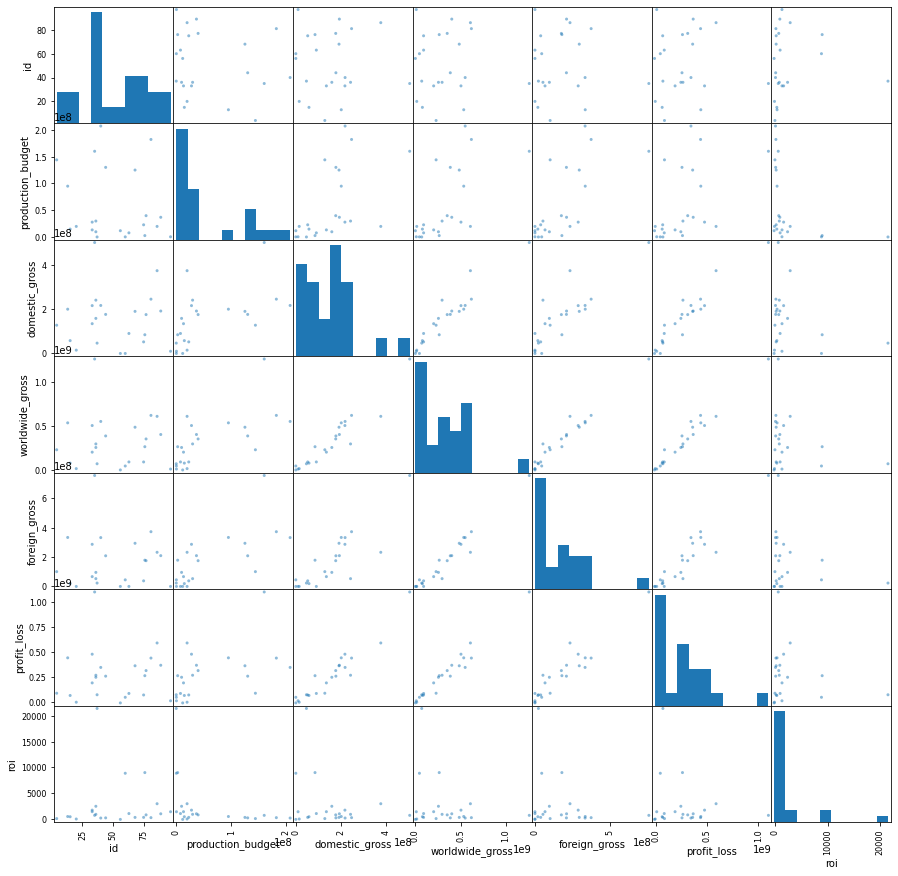

In [71]:
pd.plotting.scatter_matrix(samenamemovies, figsize=(15,15));

In [145]:
samenamemovies.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,23.000000,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,23.000000
mean,51.043478,5.669117e+07,1.532736e+08,3.193282e+08,1.660546e+08,2.626370e+08,2414.523861
std,26.740297,6.627972e+07,1.225910e+08,2.900734e+08,1.783646e+08,2.510174e+08,4818.652782
min,4.000000,3.250000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+07,-100.000000
25%,34.000000,1.100000e+07,5.544180e+07,8.406442e+07,3.050000e+07,6.864472e+07,264.121219
50%,44.000000,2.300000e+07,1.593420e+08,2.635914e+08,1.006581e+08,2.559979e+08,779.437345
75%,75.500000,1.100000e+08,2.092508e+08,4.945275e+08,2.595369e+08,3.626425e+08,1548.237825
max,97.000000,2.070000e+08,5.040142e+08,1.259200e+09,7.551855e+08,1.099200e+09,21438.461538


In [51]:
dfpnlroi.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.000000
mean,52.097403,3.688295e+07,1.875111e+08,4.492830e+08,2.617720e+08,4.124001e+08,2589.942600
std,27.115046,3.843575e+07,1.156180e+08,2.981872e+08,2.110623e+08,2.722996e+08,4849.471520
min,2.000000,3.250000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+07,-100.000000
25%,27.000000,1.400000e+07,1.177050e+08,2.691111e+08,1.347221e+08,2.540567e+08,923.043907
50%,54.000000,2.300000e+07,1.694095e+08,3.516975e+08,2.024859e+08,3.201020e+08,1337.299958
75%,75.000000,4.150000e+07,2.420189e+08,5.441326e+08,2.984265e+08,4.860073e+08,2245.155600
max,100.000000,2.070000e+08,6.593639e+08,2.208208e+09,1.548844e+09,2.008208e+09,41283.333333


In [94]:
thenumbers.sort_values(by='profit_loss', ascending=False).head(500).describe() 
#minimum of top 500 pnl is 2.037891e+08 (Paddington)

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,52.402000,1.014892e+08,2.060151e+08,5.351701e+08,3.291550e+08,4.336809e+08,994.129800
std,27.609726,7.038439e+07,1.150503e+08,3.046938e+08,2.150873e+08,2.628729e+08,2705.466313
min,1.000000,6.000000e+05,3.276600e+04,2.129288e+08,4.974632e+07,2.037891e+08,110.232772
25%,29.000000,4.475000e+07,1.348572e+08,3.318335e+08,1.884257e+08,2.570552e+08,294.116333
50%,52.000000,9.000000e+07,1.787136e+08,4.323984e+08,2.671379e+08,3.413863e+08,432.354309
75%,75.250000,1.500000e+08,2.460727e+08,6.521509e+08,4.197305e+08,5.247946e+08,826.323140
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,41283.333333


In [99]:
thenumbers.sort_values(by='roi', ascending=False).head(500)
#minimum of top 500 roi is 759.705987 (The Woman in Black)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,0.0,44975000.0,179900.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,91000000.0,99550000.0,49775.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,86264224.0,193733034.0,43051.785333
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,18892064.0,41556474.0,41556.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,107760901.0,247700000.0,41283.333333
...,...,...,...,...,...,...,...,...,...
4085,86,"Jul 12, 1991",Boyz n the Hood,6500000.0,56190094.0,56215095.0,25001.0,49715095.0,764.847615
2406,7,"Nov 11, 1994",The Santa Clause,22000000.0,144833357.0,189800000.0,44966643.0,167800000.0,762.727273
842,43,"Dec 22, 2004",Meet the Fockers,60000000.0,279167575.0,516567575.0,237400000.0,456567575.0,760.945958
3890,91,"Jun 27, 2014",Begin Again,8000000.0,16170632.0,68838736.0,52668104.0,60838736.0,760.484200


In [147]:
samenamemovies2 = samenamemovies[samenamemovies["profit_loss"] > 203789100]
samenamemovies2.sort_values(by = "profit_loss", ascending = False)
#samenamemovies5 = samenamemovies2[samenamemovies2["roi"] > 759.705987]
#samenamemovies5

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,6.084311e+08,232373866.0,5.884311e+08,2942.155660
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557


In [148]:
samenamemovies3 = samenamemovies[samenamemovies["roi"] > 759.705987]
samenamemovies3.sort_values(by = "roi", ascending = False)
#samenamemovies4 = samenamemovies3[samenamemovies3["profit_loss"] > 203789100]
#samenamemovies4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
5536,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,70000000.0,23000000.0,69675000.0,21438.461538
4775,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,178591415.0,260691415.0,8989.359138
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,44793168.0,44777735.0,44293168.0,8858.633600
2485,86,"Nov 13, 1991",Beauty and the Beast,20000000.0,376057266.0,608431132.0,232373866.0,588431132.0,2942.155660
3535,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,254900667.0,95558652.0,244900667.0,2449.006670
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,504050219.0,286700000.0,476050219.0,1700.179354
3232,33,"Mar 30, 1990",Teenage Mutant Ninja Turtles,13500000.0,135265915.0,202000000.0,66734085.0,188500000.0,1396.296296
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,10000650.0,650.0,9328650.0,1388.191964
3862,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,90815558.0,0.0,82815558.0,1035.194475
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,402280159.0,209510305.0,365280159.0,987.243673


In [150]:
worthymovies = pd.concat([samenamemovies2, samenamemovies3]).drop_duplicates()
worthymovies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,332437332.0,3.435174e+08,165.950414
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,755185541.0,1.099200e+09,686.999816
243,44,"Mar 27, 2015",Home,130000000.0,177397510.0,3.859979e+08,208600386.0,2.559979e+08,196.921458
267,68,"Aug 8, 2014",Teenage Mutant Ninja Turtles,125000000.0,191204754.0,4.850048e+08,293800000.0,3.600048e+08,288.003803
412,13,"Mar 13, 2015",Cinderella,95000000.0,201151353.0,5.345514e+08,333400000.0,4.395514e+08,462.685635
1376,77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,3.517749e+08,175183320.0,3.117749e+08,779.437345
1588,89,"Nov 21, 2008",Twilight,37000000.0,192769854.0,4.022802e+08,209510305.0,3.652802e+08,987.243673
1835,36,"Jun 8, 1984",Ghostbusters,30000000.0,242212467.0,2.952125e+08,53000000.0,2.652125e+08,884.041557
2032,33,"Nov 11, 1992",Aladdin,28000000.0,217350219.0,5.040502e+08,286700000.0,4.760502e+08,1700.179354


In [157]:
unworthymovies = samenamemovies[~samenamemovies.isin(worthymovies)].dropna()
unworthymovies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
203,4.0,"Jul 15, 2016",Ghostbusters,144000000.0,128350574.0,229008658.0,100658084.0,85008658.0,59.033790
2374,75.0,"Dec 17, 1976",King Kong,23000000.0,52614445.0,90614445.0,38000000.0,67614445.0,293.975848
2619,20.0,"Mar 6, 1998",Twilight,20000000.0,15055091.0,15055091.0,0.0,-4944909.0,-24.724545
3014,15.0,"Aug 31, 2007",Halloween,15000000.0,58269151.0,77514401.0,19245250.0,62514401.0,416.762673
3455,56.0,"Jun 5, 2009",Home,12000000.0,0.0,0.0,0.0,-12000000.0,-100.000000


In [143]:
dfpnlroi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
39,40,"Dec 14, 2005",King Kong,207000000.0,218080025.0,5.505174e+08,3.324373e+08,3.435174e+08,165.950414
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09,2.008208e+09,1004.104198
80,81,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,3.725000e+08,4.372343e+08,240.238634
134,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,7.551855e+08,1.099200e+09,686.999816
203,4,"Jul 15, 2016",Ghostbusters,144000000.0,128350574.0,2.290087e+08,1.006581e+08,8.500866e+07,59.033790
...,...,...,...,...,...,...,...,...,...
5346,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,2.680000e+08,1.652030e+08,2.671420e+08,31135.431235
5396,97,"Apr 7, 1933",King Kong,672000.0,10000000.0,1.000065e+07,6.500000e+02,9.328650e+06,1388.191964
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,2.483000e+08,1.077609e+08,2.477000e+08,41283.333333
5459,60,"Apr 23, 2009",Home,500000.0,15433.0,4.479317e+07,4.477774e+07,4.429317e+07,8858.633600


In [161]:
dfpnlroi2 = dfpnlroi[~dfpnlroi.isin(unworthymovies)].dropna()

In [166]:
dfpnlroi2.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,149.000000,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,149.000000
mean,52.704698,3.668440e+07,1.920967e+08,4.615933e+08,2.694965e+08,4.249089e+08,2672.524246
std,26.910137,3.793417e+07,1.144551e+08,2.949545e+08,2.101310e+08,2.678546e+08,4909.085714
min,2.000000,3.250000e+05,1.543300e+04,1.000065e+07,0.000000e+00,9.328650e+06,165.950414
25%,28.000000,1.400000e+07,1.212481e+08,2.749499e+08,1.414032e+08,2.565000e+08,973.354526
50%,55.000000,2.400000e+07,1.728254e+08,3.567996e+08,2.086004e+08,3.336201e+08,1358.947368
75%,75.000000,4.200000e+07,2.467343e+08,5.505174e+08,3.256000e+08,4.937967e+08,2275.053647
max,100.000000,2.070000e+08,6.593639e+08,2.208208e+09,1.548844e+09,2.008208e+09,41283.333333


In [167]:
thenumbers.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,5.989970e+07,380.016137
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,1.460889e+08,2953.028231
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.002376e+08,-100.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-2.189071e+06,-50.770440
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,8.550286e+06,70.830983
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,6.096850e+07,275.834608
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,2.351345e+09,179900.000000


In [196]:
dfpnlroi2['release_date'] = pd.to_datetime(dfpnlroi2['release_date'])
dfpnlroi2.sort_values(by="release_date", ascending=False).head(60)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,year
80,81.0,2019-05-24,Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,4.372343e+08,240.238634,"May 24, 2019"
2487,88.0,2019-03-22,Us,20000000.0,175006930.0,2.542103e+08,79203380.0,2.342103e+08,1171.051550,NaN
2499,100.0,2019-01-18,Glass,20000000.0,111035005.0,2.453035e+08,134268500.0,2.253035e+08,1126.517525,NaN
2370,71.0,2018-11-16,Green Book,23000000.0,85080171.0,3.220344e+08,236954268.0,2.990344e+08,1300.149735,NaN
983,84.0,2018-11-02,Bohemian Rhapsody,55000000.0,216303339.0,8.949853e+08,678682003.0,8.399853e+08,1527.246076,NaN
3535,36.0,2018-10-19,Halloween,10000000.0,159342015.0,2.549007e+08,95558652.0,2.449007e+08,2449.006670,NaN
1604,5.0,2018-10-05,A Star is Born,36000000.0,215288866.0,4.334496e+08,218160705.0,3.974496e+08,1104.026586,NaN
2865,66.0,2018-04-06,A Quiet Place,17000000.0,188024361.0,3.345223e+08,146497933.0,3.175223e+08,1867.778200,NaN
437,38.0,2017-12-20,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,559987277.0,8.744962e+08,971.662437,NaN
2494,95.0,2017-11-17,Wonder,20000000.0,132422809.0,3.046047e+08,172181903.0,2.846047e+08,1423.023560,NaN


In [189]:
dfpnlroi2["release_date"].apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    149
Name: release_date, dtype: int64

In [251]:
dfpnlroi2["release_date"].min()

Timestamp('1933-04-07 00:00:00')

In [252]:
dfpnlroi2["release_date"].max()

Timestamp('2019-05-24 00:00:00')

In [554]:
dfpnlroi[dfpnlroi['movie'].str.contains('mission', regex=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi


In [193]:
pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [212]:
bomdf = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [560]:
newbomdf = pd.read_csv("zippedData/movie_gross_data.csv", index_col=0)

In [216]:
bomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [218]:
bomdf.sort_values(by="year", ascending=False).head(60)

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
3179,Overlord,Par.,21700000.0,20000000,2018
3180,The Darkest Minds,Fox,12700000.0,28400000,2018
3181,Holmes and Watson,Sony,30600000.0,9900000,2018
3182,Show Dogs,Global Road,17900000.0,21300000,2018
3184,Namiya,CL,70800.0,35300000,2018


In [564]:
newbomdf[newbomdf['Release Group'].str.contains('Mission', regex=False)]

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
68,69,My Hero Academia: World Heroes' Mission,"$46,951,862","$12,271,658",26.1%,"$34,680,204",73.9%,2021
193,194,The Secret Mission,"$21,083,522",-,-,"$21,083,522",100%,2019
7,8,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018
194,195,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017
147,148,Mission Milano,"$37,749,848",-,-,"$37,749,848",100%,2016
7,8,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015
4,5,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011
7,8,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006
197,198,Samurai Commando Mission 1549,"$14,648,713",-,-,"$14,648,713",100%,2005
46,47,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002


In [217]:
newbomdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440 entries, 0 to 34
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           8440 non-null   int64 
 1   Release Group  8440 non-null   object
 2   Worldwide      8440 non-null   object
 3   Domestic       8440 non-null   object
 4   %              8440 non-null   object
 5   Foreign        8440 non-null   object
 6   %.1            8440 non-null   object
 7   year           8440 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 593.4+ KB


In [219]:
newbomdf.sort_values(by="year", ascending=False).head(60)

,Rank,Release Group,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
138,139,Even if This Love Disappears from the World To...,"$3,979,991",-,-,"$3,979,991",100%,2022
128,129,Vysehrad: Fylm,"$4,462,369",-,-,"$4,462,369",100%,2022
129,130,Free! The Final Stroke Part 2,"$4,305,978",-,-,"$4,305,978",100%,2022
130,131,Permis de construire,"$4,298,296",-,-,"$4,298,296",100%,2022
131,132,Pawankhind,"$4,260,686",-,-,"$4,260,686",100%,2022
132,133,Fireheart,"$4,222,519","$49,848",1.2%,"$4,172,671",98.8%,2022
133,134,The Godfather 2022 Re-release,"$4,214,662","$1,414,662",33.6%,"$2,800,000",66.4%,2022
134,135,Em Va Trinh,"$4,164,201",-,-,"$4,164,201",100%,2022
135,136,National Theatre Live: Prima Facie,"$4,096,029",-,-,"$4,096,029",100%,2022


In [221]:
budgets = pd.read_csv("zippedData/movies budgets.csv")

In [265]:
justbudgets = budgets.drop(droplist,axis=1) #just extract budgets

In [266]:
justbudgets.drop(justbudgets[justbudgets['budget'] <= 1].index, inplace = True) #remove records with no budget info

In [270]:
justbudgets.drop_duplicates(inplace=True)

In [273]:
justbudgets["movie (year)"] = justbudgets['title'].astype(str) + " (" + justbudgets['release_date'].str[0:4] + ")"

In [274]:
justbudgets

,title,release_date,budget,movie (year)
1,Thor: Love and Thunder,2022-07-06,250000000.0,Thor: Love and Thunder (2022)
2,Jurassic World Dominion,2022-06-01,165000000.0,Jurassic World Dominion (2022)
3,Minions: The Rise of Gru,2022-06-29,85000000.0,Minions: The Rise of Gru (2022)
4,Top Gun: Maverick,2022-05-24,170000000.0,Top Gun: Maverick (2022)
5,The Black Phone,2022-06-22,18800000.0,The Black Phone (2022)
...,...,...,...,...
754889,A Choreography of Violence,2018-09-25,200.0,A Choreography of Violence (2018)
754902,Free To Ride: The Documentary,2017-02-15,200.0,Free To Ride: The Documentary (2017)
754984,Maslakh,2016-10-19,10000.0,Maslakh (2016)
755038,Limp-dick,2018-01-01,100.0,Limp-dick (2018)


In [268]:
justbudgetsdup = justbudgets[justbudgets.duplicated(keep=False)]

In [269]:
justbudgetsdup.head(50)

,title,release_date,budget
329,Wild Indian,2021-09-03,20000000.0
417,The Shack,2017-03-03,20000000.0
477,The Shack,2017-03-03,20000000.0
578,The Shack,2017-03-03,20000000.0
581,Wild Indian,2021-09-03,20000000.0
914,Benny Loves You,2019-11-21,10000.0
952,Odd Thomas,2013-01-29,27000000.0
1197,Deep Blue Sea 3,2020-08-25,5000000.0
1198,Sentinelle,2021-03-05,6500000.0
1255,Sentinelle,2021-03-05,6500000.0


In [ ]:
#pd.merge(df1,df2,on ='Name', how ='left')

In [228]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755117 entries, 0 to 755116
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    755117 non-null  int64  
 1   title                 755113 non-null  object 
 2   genres                530801 non-null  object 
 3   original_language     755117 non-null  object 
 4   overview              631608 non-null  object 
 5   popularity            755117 non-null  float64
 6   production_companies  350195 non-null  object 
 7   release_date          695670 non-null  object 
 8   budget                755117 non-null  float64
 9   revenue               755117 non-null  float64
 10  runtime               715324 non-null  float64
 11  status                755117 non-null  object 
 12  tagline               111394 non-null  object 
 13  vote_average          755117 non-null  float64
 14  vote_count            755117 non-null  float64
 15  

In [231]:
droplist = list(budgets.columns)

In [236]:
droplist.remove('title')

In [237]:
droplist.remove('budget')

In [264]:
droplist.remove('release_date')

In [253]:
newbomdf.rename({'Release Group': 'title'}, axis=1, inplace=True)

In [275]:
newbomdf.duplicated().values.sum()

0

In [276]:
newbomdf

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022
...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977


In [278]:
newbomdf["movie (year)"] = newbomdf['title'].astype(str) + " (" + newbomdf['year'].astype(str).str[0:4] + ")"

In [539]:
newbomdf[newbomdf['movie (year)'].str.contains('mission', regex=False)]

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year,movie (year)
37,38,BTS Permission to Dance on Stage - Seoul: Live...,"$32,600,000","$6,840,000",21%,"$25,760,000",79%,2022,BTS Permission to Dance on Stage - Seoul: Live...


In [279]:
newbomdf

,Rank,title,Worldwide,Domestic,%,Foreign,%.1,year,movie (year)
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022)
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022)
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022)
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022)
...,...,...,...,...,...,...,...,...,...
30,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977,"Race for Your Life, Charlie Brown (1977)"
31,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977,March or Die (1977)
32,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977,Joseph Andrews (1977)
33,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977,Citizens Band (1977)


In [280]:
mergenewbombudgets = pd.merge(newbomdf,justbudgets,on ='movie (year)', how ='left')

In [285]:
mergenewbombudgets

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022),The Batman,2022-03-01,185000000.0
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8441,31,"Race for Your Life, Charlie Brown","$3,223,888","$3,223,888",100%,-,-,1977,"Race for Your Life, Charlie Brown (1977)",NaN,NaN,NaN
8442,32,March or Die,"$1,000,000","$1,000,000",100%,-,-,1977,March or Die (1977),NaN,NaN,NaN
8443,33,Joseph Andrews,"$839,865","$839,865",100%,-,-,1977,Joseph Andrews (1977),NaN,NaN,NaN
8444,34,Citizens Band,"$815,530","$815,530",100%,-,-,1977,Citizens Band (1977),NaN,NaN,NaN


In [286]:
mergenewbombudgets.dropna(inplace=True)

In [294]:
mergenewbombudgets

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
0,1,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022,Top Gun: Maverick (2022),Top Gun: Maverick,2022-05-24,170000000.0
1,2,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022,Jurassic World Dominion (2022),Jurassic World Dominion,2022-06-01,165000000.0
2,3,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,2022-05-04,200000001.0
3,4,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022,The Batman (2022),The Batman,2022-03-01,185000000.0
4,5,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,2022-06-29,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8424,14,Exorcist II: The Heretic,"$30,749,142","$30,749,142",100%,-,-,1977,Exorcist II: The Heretic (1977),Exorcist II: The Heretic,1977-06-17,14000000.0
8425,15,The Rescuers,"$29,000,000","$29,000,000",100%,-,-,1977,The Rescuers (1977),The Rescuers,1977-06-22,1200000.0
8428,18,The Gauntlet,"$26,414,658","$26,414,658",100%,-,-,1977,The Gauntlet (1977),The Gauntlet,1977-12-21,5500000.0
8436,26,"New York, New York","$16,400,000","$16,400,000",100%,-,-,1977,"New York, New York (1977)","New York, New York",1977-06-21,14000000.0


In [289]:
thenumbers #first time i did this, didn't create movie+year so had to do extra cool programming to deal with movies that share same name
#this time, tho, I will deal with this ahead of time

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,315.369636
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03,-100.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05,2.344950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,-3.662000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03,-100.000000


In [575]:
thenumbers["movie (year)"] = thenumbers['movie'].astype(str) + " (" + thenumbers['release_date'].astype(str).str[-4:] + ")"

In [576]:
thenumbers.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,movie (year)
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,553.257713,Avatar (2009)
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,154.667286,Pirates of the Caribbean: On Stranger Tides (2...
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,-57.210757,Dark Phoenix (2019)
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,324.384139,Avengers: Age of Ultron (2015)
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,315.369636,Star Wars Ep. VIII: The Last Jedi (2017)
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,1.747311e+09,571.016739,Star Wars Ep. VII: The Force Awakens (2015)
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,1.748134e+09,582.711400,Avengers: Infinity War (2018)
7,8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,6.634204e+08,221.140142,Pirates of the Caribbean: At World's End (2007)
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,3.559452e+08,118.648403,Justice League (2017)
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,5.796209e+08,193.206974,Spectre (2015)


In [574]:
thenumbers[thenumbers['movie (year)'].str.contains('Pirates', regex=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,movie (year)
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,804600000.0,635063875.0,154.667286,Pirates of the Caribbean: On Stranger Tides (2...
7,8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,654000000.0,663420425.0,221.140142,Pirates of the Caribbean: At Worldâs End (2007)
24,25,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,615682261.0,558241137.0,242.713538,Pirates of the Caribbean: Dead Men Tell No Tal...
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Man's Chest,225000000.0,423315812.0,1.066216e+09,642900000.0,841215812.0,373.873694,Pirates of the Caribbean: Dead Manâs Chest (...
205,6,"Jul 9, 2003",Pirates of the Caribbean: The Curse of the Bla...,140000000.0,305411224.0,6.349541e+08,329542879.0,494954103.0,353.538645,Pirates of the Caribbean: The Curse of the Bla...
1033,34,"Apr 27, 2012",The Pirates! Band of Misfits,55000000.0,31051126.0,1.361436e+08,105092479.0,81143605.0,147.533827,The Pirates! Band of Misfits (2012)
1530,31,"Jul 1, 1986",Pirates,40000000.0,1641825.0,6.341825e+06,4700000.0,-33658175.0,-84.145437,Pirates (1986)
3086,87,"Jan 11, 2008",The Pirates Who Don't Do Anything: A VeggieTal...,15000000.0,12981269.0,1.324844e+07,267175.0,-1751556.0,-11.677040,The Pirates Who Don't Do Anything: A VeggieTal...
3787,88,"Mar 16, 1984",The Ice Pirates,9000000.0,13075390.0,1.307539e+07,0.0,4075390.0,45.282111,The Ice Pirates (1984)


In [573]:
thenumbers['movie'] = thenumbers['movie'].str.replace("â","'")

In [567]:
mergenewbombudgets[mergenewbombudgets['movie (year)'].str.contains('Mission', regex=False)]

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,release_date,budget
807,8,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,2018-07-13,178000000.0
1196,195,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017,Extraordinary Mission (2017),Extraordinary Mission,2017-03-31,250000.0
1410,8,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,2015-07-23,150000000.0
2207,5,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,2011-12-07,145000000.0
3210,8,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006,Mission: Impossible III (2006),Mission: Impossible III,2006-05-03,150000000.0
4050,47,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,2002-01-30,58500000.0
4404,1,Mission: Impossible II,"$546,388,108","$215,409,889",39.4%,"$330,978,219",60.6%,2000,Mission: Impossible II (2000),Mission: Impossible II,2000-05-24,125000000.0
4443,40,Mission to Mars,"$110,983,407","$60,883,407",54.9%,"$50,100,000",45.1%,2000,Mission to Mars (2000),Mission to Mars,2000-03-10,90000000.0
5209,4,Mission: Impossible,"$180,981,856","$180,981,856",100%,-,-,1996,Mission: Impossible (1996),Mission: Impossible,1996-05-22,80000000.0
7257,52,The Mission,"$17,218,023","$17,218,023",100%,-,-,1986,The Mission (1986),The Mission,1986-09-29,24500000.0


In [577]:
testing = pd.merge(mergenewbombudgets,thenumbers,on ='movie (year)', how ='outer')

In [578]:
testing[["movie (year)","budget","production_budget"]]

,movie (year),budget,production_budget
0,Top Gun: Maverick (2022),170000000.0,NaN
1,Jurassic World Dominion (2022),165000000.0,NaN
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN
3,The Batman (2022),185000000.0,NaN
4,Minions: The Rise of Gru (2022),85000000.0,NaN
...,...,...,...
7625,Red 11 (2018),NaN,7000.0
7626,Following (1999),NaN,6000.0
7627,Return to the Land of Wonders (2005),NaN,5000.0
7628,A Plague So Pleasant (2015),NaN,1400.0


In [579]:
testing[["movie (year)","budget","production_budget"]]

,movie (year),budget,production_budget
0,Top Gun: Maverick (2022),170000000.0,NaN
1,Jurassic World Dominion (2022),165000000.0,NaN
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN
3,The Batman (2022),185000000.0,NaN
4,Minions: The Rise of Gru (2022),85000000.0,NaN
...,...,...,...
7625,Red 11 (2018),NaN,7000.0
7626,Following (1999),NaN,6000.0
7627,Return to the Land of Wonders (2005),NaN,5000.0
7628,A Plague So Pleasant (2015),NaN,1400.0


In [580]:
testing['maxBudget'] = testing.apply(
    lambda row: max(row["budget"] , row["production_budget"]), axis=1)

In [581]:
testing['maxBudget'] = testing['maxBudget'].fillna(testing['production_budget'])

In [582]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               4794 non-null   float64
 1   title_x            4794 non-null   object 
 2   Worldwide          4794 non-null   object 
 3   Domestic           4794 non-null   object 
 4   %                  4794 non-null   object 
 5   Foreign            4794 non-null   object 
 6   %.1                4794 non-null   object 
 7   year               4794 non-null   float64
 8   movie (year)       7630 non-null   object 
 9   title_y            4794 non-null   object 
 10  release_date_x     4794 non-null   object 
 11  budget             4794 non-null   float64
 12  id                 5787 non-null   float64
 13  release_date_y     5787 non-null   object 
 14  movie              5787 non-null   object 
 15  production_budget  5787 non-null   float64
 16  domestic_gross     5787 

In [399]:
testing[["movie (year)","budget","production_budget", 'maxBudget']].head(2000)

,movie (year),budget,production_budget,maxBudget
0,Top Gun: Maverick (2022),170000000.0,NaN,170000000.0
1,Jurassic World Dominion (2022),165000000.0,NaN,165000000.0
2,Doctor Strange in the Multiverse of Madness (2...,200000001.0,NaN,200000001.0
3,The Batman (2022),185000000.0,NaN,185000000.0
4,Minions: The Rise of Gru (2022),85000000.0,NaN,85000000.0
...,...,...,...,...
1995,The Host (2006),11000000.0,NaN,11000000.0
1996,The Illusionist (2006),16500000.0,16500000.0,16500000.0
1997,RV (2006),50000000.0,NaN,50000000.0
1998,The Shaggy Dog (2006),50000000.0,60000000.0,60000000.0


In [402]:
testing.head(4000)

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,...,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
0,1.0,Top Gun: Maverick,"$1,354,758,251","$664,758,251",49.1%,"$690,000,000",50.9%,2022.0,Top Gun: Maverick (2022),Top Gun: Maverick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000000.0
1,2.0,Jurassic World Dominion,"$960,654,170","$372,208,170",38.7%,"$588,446,000",61.3%,2022.0,Jurassic World Dominion (2022),Jurassic World Dominion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165000000.0
2,3.0,Doctor Strange in the Multiverse of Madness,"$954,860,995","$411,329,527",43.1%,"$543,531,468",56.9%,2022.0,Doctor Strange in the Multiverse of Madness (2...,Doctor Strange in the Multiverse of Madness,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000001.0
3,4.0,The Batman,"$770,836,163","$369,345,583",47.9%,"$401,490,580",52.1%,2022.0,The Batman (2022),The Batman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185000000.0
4,5.0,Minions: The Rise of Gru,"$761,636,228","$337,056,160",44.3%,"$424,580,068",55.7%,2022.0,Minions: The Rise of Gru (2022),Minions: The Rise of Gru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,54.0,The Russia House,"$22,997,992","$22,997,992",100%,-,-,1990.0,The Russia House (1990),The Russia House,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21800000.0
3996,55.0,The First Power,"$22,424,195","$22,424,195",100%,-,-,1990.0,The First Power (1990),The First Power,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0
3997,56.0,The Rookie,"$21,633,874","$21,633,874",100%,-,-,1990.0,The Rookie (1990),The Rookie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0
3998,58.0,The Adventures of Ford Fairlane,"$21,413,502","$21,413,502",100%,-,-,1990.0,The Adventures of Ford Fairlane (1990),The Adventures of Ford Fairlane,...,12.0,"Jul 11, 1990",The Adventures of Ford Fairlane,49000000.0,20423389.0,20423389.0,0.0,-28576611.0,-58.319614,49000000.0


In [583]:
testing[testing['movie (year)'].str.contains('Mission', regex=False)]

,Rank,title_x,Worldwide,Domestic,%,Foreign,%.1,year,movie (year),title_y,...,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
306,8.0,Mission: Impossible - Fallout,"$791,115,104","$220,159,104",27.8%,"$570,956,000",72.2%,2018.0,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,...,92.0,"Jul 27, 2018",Mission: Impossible - Fallout,178000000.0,220159104.0,787456552.0,567297448.0,609456552.0,342.391321,178000000.0
566,195.0,Extraordinary Mission,"$22,757,764","$54,174",0.2%,"$22,703,590",99.8%,2017.0,Extraordinary Mission (2017),Extraordinary Mission,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
719,8.0,Mission: Impossible - Rogue Nation,"$682,714,267","$195,042,377",28.6%,"$487,671,890",71.4%,2015.0,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,...,68.0,"Jul 31, 2015",Mission: Impossible - Rogue Nation,150000000.0,195042377.0,688858992.0,493816615.0,538858992.0,359.239328,150000000.0
1242,5.0,Mission: Impossible - Ghost Protocol,"$694,713,380","$209,397,903",30.1%,"$485,315,477",69.9%,2011.0,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,...,98.0,"Dec 16, 2011",Mission: Impossible - Ghost Protocol,145000000.0,209397903.0,694713230.0,485315327.0,549713230.0,379.112572,145000000.0
1941,8.0,Mission: Impossible III,"$398,479,497","$134,029,801",33.6%,"$264,449,696",66.4%,2006.0,Mission: Impossible III (2006),Mission: Impossible III,...,80.0,"May 5, 2006",Mission: Impossible III,150000000.0,133501348.0,397501348.0,264000000.0,247501348.0,165.000899,150000000.0
2546,47.0,Asterix & Obelix: Mission Cleopatra,"$108,012,365",-,-,"$108,012,365",100%,2002.0,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58500000.0
2791,1.0,Mission: Impossible II,"$546,388,108","$215,409,889",39.4%,"$330,978,219",60.6%,2000.0,Mission: Impossible II (2000),Mission: Impossible II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000000.0
2827,40.0,Mission to Mars,"$110,983,407","$60,883,407",54.9%,"$50,100,000",45.1%,2000.0,Mission to Mars (2000),Mission to Mars,...,69.0,"Mar 10, 2000",Mission to Mars,90000000.0,60874615.0,106000000.0,45125385.0,16000000.0,17.777778,90000000.0
3325,4.0,Mission: Impossible,"$180,981,856","$180,981,856",100%,-,-,1996.0,Mission: Impossible (1996),Mission: Impossible,...,40.0,"May 21, 1996",Mission: Impossible,80000000.0,180981886.0,457697994.0,276716108.0,377697994.0,472.122492,80000000.0
4328,52.0,The Mission,"$17,218,023","$17,218,023",100%,-,-,1986.0,The Mission (1986),The Mission,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24500000.0


In [584]:
test = testing.drop(["Rank","%","%.1"], axis=1)

In [585]:
test[~test.isnull().any(axis=1)]

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget
191,Captain Marvel,"$1,128,274,794","$426,829,839","$701,444,955",2019.0,Captain Marvel (2019),Captain Marvel,2019-03-06,152000000.0,96.0,"Mar 8, 2019",Captain Marvel,175000000.0,426525952.0,1.123062e+09,696535598.0,948061550.0,541.749457,175000000.0
194,Aladdin,"$1,050,693,953","$355,559,216","$695,134,737",2019.0,Aladdin (2019),Aladdin,2019-05-22,183000000.0,81.0,"May 24, 2019",Aladdin,182000000.0,246734314.0,6.192343e+08,372500000.0,437234314.0,240.238634,183000000.0
199,How to Train Your Dragon: The Hidden World,"$521,799,505","$160,799,505","$361,000,000",2019.0,How to Train Your Dragon: The Hidden World (2019),How to Train Your Dragon: The Hidden World,2019-01-03,129000000.0,56.0,"Feb 22, 2019",How to Train Your Dragon: The Hidden World,129000000.0,160791800.0,5.192583e+08,358466483.0,390258283.0,302.525801,129000000.0
202,The Secret Life of Pets 2,"$430,051,293","$158,874,395","$271,176,898",2019.0,The Secret Life of Pets 2 (2019),The Secret Life of Pets 2,2019-05-24,80000000.0,81.0,"Jun 7, 2019",The Secret Life of Pets 2,80000000.0,63795655.0,1.133515e+08,49555841.0,33351496.0,41.689370,80000000.0
203,Alita: Battle Angel,"$404,980,543","$85,838,210","$319,142,333",2019.0,Alita: Battle Angel (2019),Alita: Battle Angel,2019-01-31,170000000.0,24.0,"Feb 14, 2019",Alita: Battle Angel,170000000.0,85710210.0,4.029760e+08,317265826.0,232976036.0,137.044727,170000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Annie Hall,"$38,251,425","$38,251,425",-,1977.0,Annie Hall (1977),Annie Hall,1977-04-19,4000000.0,80.0,"Apr 20, 1977",Annie Hall,4000000.0,38251425.0,3.825142e+07,0.0,34251425.0,856.285625,4000000.0
4786,Pete's Dragon,"$35,488,000","$35,488,000",-,1977.0,Pete's Dragon (1977),Pete's Dragon,1977-11-03,10000000.0,67.0,"Nov 3, 1977",Pete's Dragon,10000000.0,36000000.0,3.600000e+07,0.0,26000000.0,260.000000,10000000.0
4788,High Anxiety,"$31,063,038","$31,063,038",-,1977.0,High Anxiety (1977),High Anxiety,1977-12-25,4015000.0,36.0,"Dec 23, 1977",High Anxiety,3400000.0,31063038.0,3.106304e+07,0.0,27663038.0,813.618765,4015000.0
4789,Exorcist II: The Heretic,"$30,749,142","$30,749,142",-,1977.0,Exorcist II: The Heretic (1977),Exorcist II: The Heretic,1977-06-17,14000000.0,94.0,"Jun 17, 1977",Exorcist II: The Heretic,14000000.0,25011000.0,2.501100e+07,0.0,11011000.0,78.650000,14000000.0


In [586]:
test[['Worldwide','worldwide_gross','movie (year)']]

,Worldwide,worldwide_gross,movie (year)
0,"$1,354,758,251",NaN,Top Gun: Maverick (2022)
1,"$960,654,170",NaN,Jurassic World Dominion (2022)
2,"$954,860,995",NaN,Doctor Strange in the Multiverse of Madness (2...
3,"$770,836,163",NaN,The Batman (2022)
4,"$761,636,228",NaN,Minions: The Rise of Gru (2022)
...,...,...,...
7625,NaN,0.0,Red 11 (2018)
7626,NaN,240495.0,Following (1999)
7627,NaN,1338.0,Return to the Land of Wonders (2005)
7628,NaN,0.0,A Plague So Pleasant (2015)


In [587]:
test["Worldwide"] = test["Worldwide"].replace({'\$': '', ',': ''}, regex=True).astype(float)
test["Worldwide"].apply(type).value_counts()

<class 'float'>    7630
Name: Worldwide, dtype: int64

In [588]:
test["Domestic"] = test["Domestic"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)
test["Domestic"].apply(type).value_counts()

<class 'float'>    7630
Name: Domestic, dtype: int64

In [589]:
test["Foreign"] = test["Foreign"].replace({'\$': '', ',': '', '-': '0'}, regex=True).astype(float)
test["Foreign"].apply(type).value_counts()

<class 'float'>    7630
Name: Foreign, dtype: int64

In [590]:
test['WW UTD'] = test.apply(
    lambda row: max(row["Worldwide"] , row["worldwide_gross"]), axis=1)
test['WW UTD'] = test['WW UTD'].fillna(testing['worldwide_gross'])

In [591]:
test[['Worldwide','worldwide_gross','WW UTD','movie (year)']].head(4800)

,Worldwide,worldwide_gross,WW UTD,movie (year)
0,1.354758e+09,NaN,1.354758e+09,Top Gun: Maverick (2022)
1,9.606542e+08,NaN,9.606542e+08,Jurassic World Dominion (2022)
2,9.548610e+08,NaN,9.548610e+08,Doctor Strange in the Multiverse of Madness (2...
3,7.708362e+08,NaN,7.708362e+08,The Batman (2022)
4,7.616362e+08,NaN,7.616362e+08,Minions: The Rise of Gru (2022)
...,...,...,...,...
4795,NaN,1.316722e+09,1.316722e+09,Star Wars Ep. VIII: The Last Jedi (2017)
4796,NaN,2.053311e+09,2.053311e+09,Star Wars Ep. VII: The Force Awakens (2015)
4797,NaN,4.592609e+08,4.592609e+08,X-Men: The Last Stand (2006)
4798,NaN,8.623162e+08,8.623162e+08,Guardians of the Galaxy Vol 2 (2017)


In [592]:
test['DOM UTD'] = test.apply(
    lambda row: max(row["Domestic"] , row["domestic_gross"]), axis=1)
test['DOM UTD'] = test['DOM UTD'].fillna(testing['domestic_gross'])

In [593]:
test['FOR UTD'] = test.apply(
    lambda row: max(row["Foreign"] , row["foreign_gross"]), axis=1)
test['FOR UTD'] = test['FOR UTD'].fillna(testing['foreign_gross'])

In [594]:
test["profit_loss"] = test["WW UTD"] - test["maxBudget"]

In [595]:
test["roi"] = (test["profit_loss"] / test["maxBudget"] ) *100

In [596]:
test["Year"] = test['movie (year)'].str[-5:-1].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 0 to 7629
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_x            4794 non-null   object 
 1   Worldwide          4794 non-null   float64
 2   Domestic           4794 non-null   float64
 3   Foreign            4794 non-null   float64
 4   year               4794 non-null   float64
 5   movie (year)       7630 non-null   object 
 6   title_y            4794 non-null   object 
 7   release_date_x     4794 non-null   object 
 8   budget             4794 non-null   float64
 9   id                 5787 non-null   float64
 10  release_date_y     5787 non-null   object 
 11  movie              5787 non-null   object 
 12  production_budget  5787 non-null   float64
 13  domestic_gross     5787 non-null   float64
 14  worldwide_gross    5787 non-null   float64
 15  foreign_gross      5787 non-null   float64
 16  profit_loss        7630 

In [597]:
test.drop("year2", axis=1, inplace=True)

KeyError: "['year2'] not found in axis"

In [598]:
test.sort_values(by='maxBudget').head(500)

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,...,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
4416,Kiss of the Spider Woman,17005229.0,17005229.0,0.0,1985.0,Kiss of the Spider Woman (1985),Kiss of the Spider Woman,1985-07-26,11.0,NaN,...,NaN,NaN,NaN,17005218.0,1.545929e+08,11.0,17005229.0,17005229.0,0.0,1985
1226,Bol Bachchan,28775262.0,1216258.0,27559004.0,2012.0,Bol Bachchan (2012),Bol Bachchan,2012-07-06,12.0,NaN,...,NaN,NaN,NaN,28775250.0,2.397938e+08,12.0,28775262.0,1216258.0,27559004.0,2012
3596,City Slickers II: The Legend of Curly's Gold,43622150.0,43622150.0,0.0,1994.0,City Slickers II: The Legend of Curly's Gold (...,City Slickers II: The Legend of Curly's Gold,1994-06-10,40.0,NaN,...,NaN,NaN,NaN,43622110.0,1.090553e+08,40.0,43622150.0,43622150.0,0.0,1994
363,Shadow,91708374.0,521396.0,91186978.0,2018.0,Shadow (2018),Shadow,2018-04-04,50.0,NaN,...,NaN,NaN,NaN,91708324.0,1.834166e+08,50.0,91708374.0,521396.0,91186978.0,2018
3946,Kickboxer 2: The Road Back,1250712.0,1250712.0,0.0,1991.0,Kickboxer 2: The Road Back (1991),Kickboxer 2: The Road Back,1991-01-30,89.0,NaN,...,NaN,NaN,NaN,1250623.0,1.405194e+06,89.0,1250712.0,1250712.0,0.0,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,NaN,NaN,NaN,NaN,NaN,On the Waterfront (1954),NaN,NaN,NaN,37.0,...,9600000.0,9600000.0,0.0,8690000.0,9.549451e+02,910000.0,9600000.0,9600000.0,0.0,1954
7204,NaN,NaN,NaN,NaN,NaN,Food Chains (2014),NaN,NaN,NaN,36.0,...,0.0,176.0,176.0,-912824.0,-9.998072e+01,913000.0,176.0,0.0,176.0,2014
7203,NaN,NaN,NaN,NaN,NaN,Lowriders (2017),NaN,NaN,NaN,35.0,...,6179955.0,6188421.0,8466.0,5272421.0,5.755918e+02,916000.0,6188421.0,6179955.0,8466.0,2017
7202,NaN,NaN,NaN,NaN,NaN,L!fe Happens (2012),NaN,NaN,NaN,34.0,...,30905.0,30905.0,0.0,-899095.0,-9.667688e+01,930000.0,30905.0,30905.0,0.0,2012


In [599]:
test.drop(test[test['maxBudget'] < 1000000].index, inplace = True) 
#dropping all records with budget data less than $1mil as its causing skews

In [600]:
test2 = test[test.columns[~test.isnull().any()]]

In [601]:
test3 = test2.sort_values(by="Year", ascending = False).head(5000) 
#take 5000 most recent movies in database, cuz we want currently which equates to 1999

In [603]:
test[test['movie (year)'].str.contains('Mission', regex=False)]

,title_x,Worldwide,Domestic,Foreign,year,movie (year),title_y,release_date_x,budget,id,...,domestic_gross,worldwide_gross,foreign_gross,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
306,Mission: Impossible - Fallout,791115104.0,220159104.0,570956000.0,2018.0,Mission: Impossible - Fallout (2018),Mission: Impossible - Fallout,2018-07-13,178000000.0,92.0,...,220159104.0,787456552.0,567297448.0,613115104.0,344.446688,178000000.0,791115104.0,220159104.0,570956000.0,2018
719,Mission: Impossible - Rogue Nation,682714267.0,195042377.0,487671890.0,2015.0,Mission: Impossible - Rogue Nation (2015),Mission: Impossible - Rogue Nation,2015-07-23,150000000.0,68.0,...,195042377.0,688858992.0,493816615.0,538858992.0,359.239328,150000000.0,688858992.0,195042377.0,493816615.0,2015
1242,Mission: Impossible - Ghost Protocol,694713380.0,209397903.0,485315477.0,2011.0,Mission: Impossible - Ghost Protocol (2011),Mission: Impossible - Ghost Protocol,2011-12-07,145000000.0,98.0,...,209397903.0,694713230.0,485315327.0,549713380.0,379.112676,145000000.0,694713380.0,209397903.0,485315477.0,2011
1941,Mission: Impossible III,398479497.0,134029801.0,264449696.0,2006.0,Mission: Impossible III (2006),Mission: Impossible III,2006-05-03,150000000.0,80.0,...,133501348.0,397501348.0,264000000.0,248479497.0,165.652998,150000000.0,398479497.0,134029801.0,264449696.0,2006
2546,Asterix & Obelix: Mission Cleopatra,108012365.0,0.0,108012365.0,2002.0,Asterix & Obelix: Mission Cleopatra (2002),Asterix & Obelix: Mission Cleopatra,2002-01-30,58500000.0,NaN,...,NaN,NaN,NaN,49512365.0,84.636521,58500000.0,108012365.0,0.0,108012365.0,2002
2791,Mission: Impossible II,546388108.0,215409889.0,330978219.0,2000.0,Mission: Impossible II (2000),Mission: Impossible II,2000-05-24,125000000.0,NaN,...,NaN,NaN,NaN,421388108.0,337.110486,125000000.0,546388108.0,215409889.0,330978219.0,2000
2827,Mission to Mars,110983407.0,60883407.0,50100000.0,2000.0,Mission to Mars (2000),Mission to Mars,2000-03-10,90000000.0,69.0,...,60874615.0,106000000.0,45125385.0,20983407.0,23.314897,90000000.0,110983407.0,60883407.0,50100000.0,2000
3325,Mission: Impossible,180981856.0,180981856.0,0.0,1996.0,Mission: Impossible (1996),Mission: Impossible,1996-05-22,80000000.0,40.0,...,180981886.0,457697994.0,276716108.0,377697994.0,472.122492,80000000.0,457697994.0,180981886.0,276716108.0,1996
4328,The Mission,17218023.0,17218023.0,0.0,1986.0,The Mission (1986),The Mission,1986-09-29,24500000.0,NaN,...,NaN,NaN,NaN,-7281977.0,-29.722355,24500000.0,17218023.0,17218023.0,0.0,1986
4823,NaN,NaN,NaN,NaN,NaN,Mission: Impossible 2 (2000),NaN,NaN,NaN,84.0,...,215409889.0,549588516.0,334178627.0,429588516.0,357.990430,120000000.0,549588516.0,215409889.0,334178627.0,2000


In [614]:
test3roi500 = test3.sort_values(by="roi", ascending = False).head(1000)['movie (year)']

4798    Guardians of the Galaxy Vol 2 (2017)
727                       San Andreas (2015)
206                           Shazam! (2019)
1190                 Moonrise Kingdom (2012)
1944                   Over the Hedge (2006)
579                             Moana (2016)
481              John Wick: Chapter 2 (2017)
1999                       Date Movie (2006)
853        How to Train Your Dragon 2 (2014)
918          The Hundred-Foot Journey (2014)
Name: movie (year), dtype: object

In [615]:
test3pnl500 = test3.sort_values(by="profit_loss", ascending = False).head(500)['movie (year)']

In [1304]:
test3[test3['movie (year)'] == "Edge of Tomorrow (2014)"]

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
861,Edge of Tomorrow (2014),192541256.0,108.169245,178000000.0,370541256.0,100206256.0,270335000.0,2014


In [1306]:
test3[test3['movie (year)'] == "How to Train Your Dragon 2 (2014)"]

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
853,How to Train Your Dragon 2 (2014),476537519.0,328.646565,145000000.0,621537519.0,177002924.0,444534595.0,2014


In [1308]:
test3pnl500.tail(6)

1533                             This Is It (2009)
2945                              Big Daddy (1999)
4799                           Tron: Legacy (2010)
1672     Journey to the Center of the Earth (2008)
2808         Crouching Tiger, Hidden Dragon (2000)
1007    Cloudy with a Chance of Meatballs 2 (2013)
Name: movie (year), dtype: object

In [1309]:
test3[test3['movie (year)'] == "Crouching Tiger, Hidden Dragon (2000)"]

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
2808,"Crouching Tiger, Hidden Dragon (2000)",196525736.0,1156.033741,17000000.0,213525736.0,128078872.0,85446864.0,2000


In [616]:
test3pnlroi500 = pd.Series(list(set(test3roi500).intersection(set(test3pnl500))))

In [1296]:
test3pnlroi500.head(60)

0                           Fifty Shades of Grey (2015)
1                                 Captain Marvel (2019)
2                              The Da Vinci Code (2006)
3                 Crouching Tiger, Hidden Dragon (2000)
4                                    Toy Story 3 (2010)
5                            The Matrix Reloaded (2003)
6                            Fifty Shades Darker (2017)
7                                 Bruce Almighty (2003)
8            Star Wars Ep. I: The Phantom Menace (1999)
9           Star Wars Ep. VII: The Force Awakens (2015)
10                                         Moana (2016)
11                                 The Lion King (2019)
12                             Bohemian Rhapsody (2018)
13                                         Hitch (2005)
14                         The Devil Wears Prada (2006)
15                               Pitch Perfect 2 (2015)
16        Star Wars Ep. II: Attack of the Clones (2002)
17                                       The Nun

In [1301]:
test3pnlroi500[test3pnlroi500 == "Edge of Tomorrow (2014)"]

Series([], dtype: object)

In [618]:
test4 = test3[test3["movie (year)"].isin(test3pnlroi500)]
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,690000000.0,2022
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,588446000.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,543531468.0,2022
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,424580068.0,2022
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,160524492.0,2021
...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),2.401382e+08,343.054540,70000000.0,3.101382e+08,152257509.0,157880669.0,1999
2939,American Beauty (1999),3.412966e+08,2275.310673,15000000.0,3.562966e+08,130096601.0,226200000.0,1999
2937,The Matrix (1999),3.985174e+08,613.103666,65000000.0,4.635174e+08,171479930.0,292037453.0,1999
2936,Toy Story 2 (1999),4.213583e+08,468.175862,90000000.0,5.113583e+08,245852179.0,265506097.0,1999


In [619]:
test4.describe()

,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
count,3.090000e+02,309.000000,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,309.000000
mean,5.192823e+08,845.026546,8.974564e+07,6.090279e+08,2.236683e+08,3.853863e+08,2011.142395
std,3.325024e+08,831.159776,6.473360e+07,3.863620e+08,1.492389e+08,2.713387e+08,6.402043
min,1.965257e+08,328.646565,5.000000e+06,2.070398e+08,0.000000e+00,5.324883e+07,1999.000000
25%,2.754440e+08,418.065455,4.000000e+07,3.194946e+08,1.324228e+08,2.016792e+08,2006.000000
50%,4.174077e+08,576.336396,7.500000e+07,4.861241e+08,1.880244e+08,2.933593e+08,2012.000000
75%,6.750597e+08,850.616275,1.250000e+08,8.140376e+08,2.961316e+08,5.238799e+08,2017.000000
max,2.441501e+09,7397.800680,4.250000e+08,2.797501e+09,9.366622e+08,2.015838e+09,2022.000000


In [620]:
test4[test4['movie (year)'].str.contains('Mission', regex=False)]

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
306,Mission: Impossible - Fallout (2018),613115104.0,344.446688,178000000.0,791115104.0,220159104.0,570956000.0,2018
719,Mission: Impossible - Rogue Nation (2015),538858992.0,359.239328,150000000.0,688858992.0,195042377.0,493816615.0,2015
1242,Mission: Impossible - Ghost Protocol (2011),549713380.0,379.112676,145000000.0,694713380.0,209397903.0,485315477.0,2011
4823,Mission: Impossible 2 (2000),429588516.0,357.990430,120000000.0,549588516.0,215409889.0,334178627.0,2000
2791,Mission: Impossible II (2000),421388108.0,337.110486,125000000.0,546388108.0,215409889.0,330978219.0,2000


In [622]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 2935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie (year)  309 non-null    object 
 1   profit_loss   309 non-null    float64
 2   roi           309 non-null    float64
 3   maxBudget     309 non-null    float64
 4   WW UTD        309 non-null    float64
 5   DOM UTD       309 non-null    float64
 6   FOR UTD       309 non-null    float64
 7   Year          309 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 21.7+ KB


In [626]:
pd.set_option('display.max_rows', None)
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,6.900000e+08,2022
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,5.884460e+08,2022
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,5.435315e+08,2022
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,4.245801e+08,2022
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,1.605245e+08,2021
60,A Quiet Place Part II (2021),2.363723e+08,387.495510,61000000.0,2.973723e+08,160072261.0,1.373000e+08,2021
55,Sing 2 (2021),3.229200e+08,379.905934,85000000.0,4.079200e+08,162790990.0,2.451291e+08,2021
52,Venom: Let There Be Carnage (2021),3.968636e+08,360.785084,110000000.0,5.068636e+08,213550366.0,2.933132e+08,2021
50,"Hi, Mom (2021)",7.630098e+08,1293.236888,59000000.0,8.220098e+08,0.0,8.220098e+08,2021
49,The Battle at Lake Changjin (2021),7.025409e+08,351.270467,200000000.0,9.025409e+08,342411.0,9.021985e+08,2021


In [627]:
pd.reset_option('display.max_rows')

In [634]:
test4=test4.drop(2513)

In [640]:
test4.describe()

,profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
count,3.080000e+02,308.000000,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000
mean,5.199939e+08,845.896298,8.986819e+07,6.098621e+08,2.238600e+08,3.860287e+08,2011.172078
std,3.328077e+08,832.371499,6.480303e+07,3.867120e+08,1.494436e+08,2.715447e+08,6.391128
min,1.965257e+08,328.646565,5.000000e+06,2.070398e+08,0.000000e+00,5.324883e+07,1999.000000
25%,2.751351e+08,418.011348,4.000000e+07,3.189647e+08,1.323403e+08,2.018939e+08,2006.000000
50%,4.181281e+08,575.682196,7.500000e+07,4.867059e+08,1.898718e+08,2.934244e+08,2012.000000
75%,6.751759e+08,852.590202,1.250000e+08,8.159553e+08,2.962546e+08,5.255424e+08,2017.000000
max,2.441501e+09,7397.800680,4.250000e+08,2.797501e+09,9.366622e+08,2.015838e+09,2022.000000


In [638]:
test4.sort_values(by="profit_loss", ascending=False).head(50)

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
187,Avengers: Endgame (2019),2.441501e+09,685.814980,356000000.0,2.797501e+09,858373000.0,1.939128e+09,2019
1510,Avatar (2009),2.351345e+09,553.257713,425000000.0,2.776345e+09,760507625.0,2.015838e+09,2009
299,Avengers: Infinity War (2018),1.748360e+09,582.786585,300000000.0,2.048360e+09,678815482.0,1.369544e+09,2018
4796,Star Wars Ep. VII: The Force Awakens (2015),1.747311e+09,571.016739,306000000.0,2.053311e+09,936662225.0,1.116649e+09,2015
48,Spider-Man: No Way Home (2021),1.701233e+09,850.616275,200000000.0,1.901233e+09,804793477.0,1.096439e+09,2021
713,Jurassic World (2015),1.455401e+09,676.930529,215000000.0,1.670401e+09,652270625.0,1.018130e+09,2015
188,The Lion King (2019),1.396943e+09,537.285921,260000000.0,1.656943e+09,543638043.0,1.113305e+09,2019
714,Furious 7 (2015),1.328723e+09,699.327786,190000000.0,1.518723e+09,353007020.0,1.165716e+09,2015
189,Frozen II (2019),1.300027e+09,866.684622,150000000.0,1.450027e+09,477373578.0,9.726534e+08,2019
1113,The Avengers (2012),1.293813e+09,575.027995,225000000.0,1.518813e+09,623357910.0,8.954551e+08,2012


In [639]:
test4.sort_values(by="roi", ascending=False).head(50)

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year
2511,My Big Fat Greek Wedding (2002),3.698900e+08,7397.800680,5000000.0,3.748900e+08,241438208.0,133451826.0,2002
6299,Split (2017),2.739648e+08,5479.296120,5000000.0,2.789648e+08,138141585.0,140823221.0,2017
465,Get Out (2017),2.504080e+08,5008.159380,5000000.0,2.554080e+08,176040665.0,79367304.0,2017
5812,Les Intouchables (2012),4.740730e+08,4389.565231,10800000.0,4.848730e+08,13182281.0,471690764.0,2012
1270,Paranormal Activity 3 (2011),2.020398e+08,4040.796880,5000000.0,2.070398e+08,104028807.0,103011037.0,2011
874,Annabelle (2014),2.505477e+08,3854.579400,6500000.0,2.570477e+08,84273813.0,172773848.0,2014
2241,Fahrenheit 9/11 (2004),2.164469e+08,3607.448033,6000000.0,2.224469e+08,119194771.0,103252111.0,2004
197,Ne Zha (2019),7.060635e+08,3530.317355,20000000.0,7.260635e+08,3695533.0,722367938.0,2019
1253,The Intouchables (2011),4.135885e+08,3181.450077,13000000.0,4.265885e+08,10198820.0,416389690.0,2011
1811,Juno (2007),2.248727e+08,2998.302413,7500000.0,2.323727e+08,143495265.0,88877416.0,2007


In [651]:
test4["Profit/Loss ($, Millions)"] = round(test4['profit_loss']/1000000)

In [653]:
test4["RoI (%)"] = round(test4['roi'])

In [655]:
test4["Budget ($, Millions)"] = round(test4['maxBudget']/1000000)

In [657]:
test4["Total Box Office ($, Millions)"] = round(test4['WW UTD']/1000000)

In [658]:
test4

,movie (year),profit_loss,roi,maxBudget,WW UTD,DOM UTD,FOR UTD,Year,"Profit/Loss ($, Millions)",RoI (%),"Budget ($, Millions)","Total Box Office ($, Millions)"
0,Top Gun: Maverick (2022),1.184758e+09,696.916618,170000000.0,1.354758e+09,664758251.0,690000000.0,2022,1185.0,697.0,170.0,1355.0
1,Jurassic World Dominion (2022),7.956542e+08,482.214648,165000000.0,9.606542e+08,372208170.0,588446000.0,2022,796.0,482.0,165.0,961.0
2,Doctor Strange in the Multiverse of Madness (2...,7.548610e+08,377.430495,200000001.0,9.548610e+08,411329527.0,543531468.0,2022,755.0,377.0,200.0,955.0
4,Minions: The Rise of Gru (2022),6.766362e+08,796.042621,85000000.0,7.616362e+08,337056160.0,424580068.0,2022,677.0,796.0,85.0,762.0
61,Encanto (2021),2.066181e+08,413.236228,50000000.0,2.566181e+08,96093622.0,160524492.0,2021,207.0,413.0,50.0,257.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2940,Runaway Bride (1999),2.401382e+08,343.054540,70000000.0,3.101382e+08,152257509.0,157880669.0,1999,240.0,343.0,70.0,310.0
2939,American Beauty (1999),3.412966e+08,2275.310673,15000000.0,3.562966e+08,130096601.0,226200000.0,1999,341.0,2275.0,15.0,356.0
2937,The Matrix (1999),3.985174e+08,613.103666,65000000.0,4.635174e+08,171479930.0,292037453.0,1999,399.0,613.0,65.0,464.0
2936,Toy Story 2 (1999),4.213583e+08,468.175862,90000000.0,5.113583e+08,245852179.0,265506097.0,1999,421.0,468.0,90.0,511.0


In [660]:
test5 = test4[["movie (year)","Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)","RoI (%)","Year"]]

In [662]:
test5.head(100)

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022
4,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022
61,Encanto (2021),50.0,257.0,207.0,413.0,2021
...,...,...,...,...,...,...
572,The Jungle Book (2016),175.0,967.0,792.0,452.0,2016
571,Zootopia (2016),150.0,1024.0,874.0,583.0,2016
570,Finding Dory (2016),200.0,1029.0,829.0,414.0,2016
569,Rogue One: A Star Wars Story (2016),200.0,1056.0,856.0,428.0,2016


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

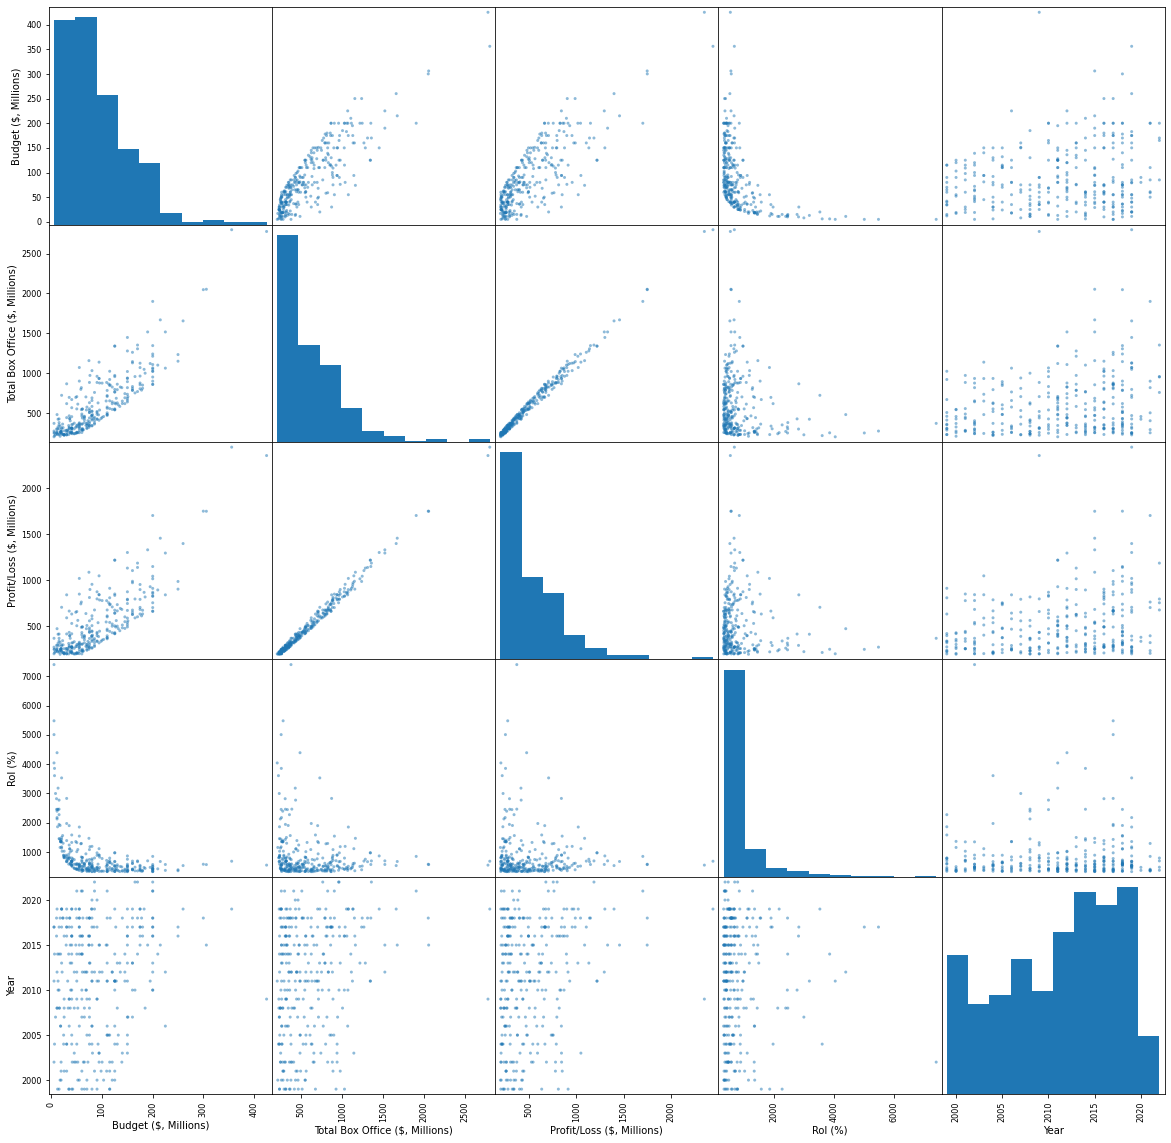

In [664]:
# Here you run your code to model the data
pd.plotting.scatter_matrix(test5, figsize=(20,20));

<Figure size 1440x1440 with 0 Axes>

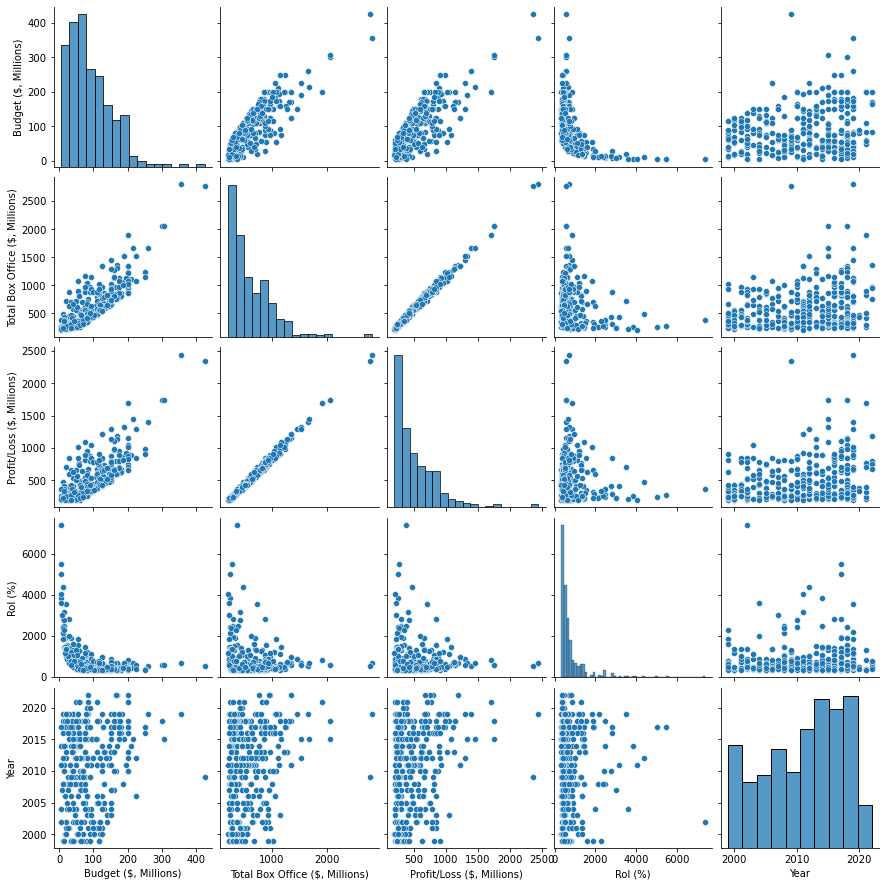

In [668]:
plt.figure(figsize=(20,20))
sns.pairplot(test5,palette="husl")

In [669]:
test5.describe()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,89.870130,609.850649,519.983766,845.844156,2011.172078
std,64.805216,386.713746,332.813096,832.369626,6.391128
min,5.000000,207.000000,197.000000,329.000000,1999.000000
25%,40.000000,318.500000,274.750000,418.000000,2006.000000
50%,75.000000,486.500000,418.000000,575.500000,2012.000000
75%,125.000000,816.000000,675.250000,853.000000,2017.000000
max,425.000000,2798.000000,2442.000000,7398.000000,2022.000000


In [671]:
test5.cov()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
"Budget ($, Millions)",4199.715978,21493.934938,17294.486484,-24101.287406,74.879098
"Total Box Office ($, Millions)",21493.934938,149547.521596,128056.437307,-53683.824654,560.856403
"Profit/Loss ($, Millions)",17294.486484,128056.437307,110764.556739,-29581.015567,485.950685
RoI (%),-24101.287406,-53683.824654,-29581.015567,692839.193875,95.925927
Year,74.879098,560.856403,485.950685,95.925927,40.846514


In [673]:
test5.corr(method='pearson')

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
"Budget ($, Millions)",1.000000,0.857662,0.801858,-0.446801,0.180789
"Total Box Office ($, Millions)",0.857662,1.000000,0.994973,-0.166778,0.226926
"Profit/Loss ($, Millions)",0.801858,0.994973,1.000000,-0.106782,0.228462
RoI (%),-0.446801,-0.166778,-0.106782,1.000000,0.018032
Year,0.180789,0.226926,0.228462,0.018032,1.000000


In [790]:
principals = pd.read_sql("""
SELECT pr.movie_id, pr.person_id, primary_name, primary_title, start_year
FROM principals AS pr
JOIN persons AS pe ON pr.person_id=pe.person_id
JOIN movie_basics AS mb ON pr.movie_id=mb.movie_id
;
""", conn)


In [791]:
principals.loc[principals[principals["primary_title"].str.contains('Top Gun')].index, 'start_year'] = 2022

In [792]:
principals["movie (year)"] = principals['primary_title'].astype(str) + " (" + principals['start_year'].astype(str).str[-4:] + ")"

In [793]:
principals["movie (year)"].value_counts()

Split (2016)                                              48
The Promise (2017)                                        38
Homecoming (2011)                                         37
Alone (2015)                                              35
Broken (2012)                                             35
                                                          ..
In Search of Echo (2019)                                   1
76 Minutes and 15 Seconds with Abbas Kiarostami (2016)     1
Stellanomicon: Future Fear (2019)                          1
Ein Karem and the Christian Revelation (2017)              1
Go to Heaven Alive (2018)                                  1
Name: movie (year), Length: 141597, dtype: int64

In [729]:
#principals['start_year'] = principals[principals["primary_title"].str.contains('Top Gun')]['start_year'] == 2022

In [741]:
principals[principals["primary_title"].str.contains('Top Gun')].index

Int64Index([164717, 164718, 164719, 164720, 164721, 164722, 164723, 164724,
            164725, 164726],
           dtype='int64')

In [794]:
principals[principals["primary_title"].str.contains('Top Gun')]

,movie_id,person_id,primary_name,primary_title,start_year,movie (year)
164717,tt1745960,nm0003160,Christopher McQuarrie,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164718,tt1745960,nm0000129,Tom Cruise,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164719,tt1745960,nm0358316,Jon Hamm,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164720,tt1745960,nm0000124,Jennifer Connelly,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164721,tt1745960,nm0000174,Val Kilmer,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164722,tt1745960,nm2676052,Joseph Kosinski,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164723,tt1745960,nm0143596,Jim Cash,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164724,tt1745960,nm0185976,Peter Craig,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164725,tt1745960,nm0258390,Jack Epps Jr.,Top Gun: Maverick,2022,Top Gun: Maverick (2022)
164726,tt1745960,nm1098479,Justin Marks,Top Gun: Maverick,2022,Top Gun: Maverick (2022)


In [795]:
principals[principals["movie (year)"].isin(test5["movie (year)"])]["movie (year)"].value_counts()

Cinderella (2015)                    20
Parasite (2019)                      19
Coco (2017)                          19
Alice in Wonderland (2010)           17
Minions (2015)                       10
                                     ..
Peter Rabbit (2018)                  10
Captain America: Civil War (2016)    10
Gone Girl (2014)                     10
Frozen II (2019)                      9
Knives Out (2019)                     9
Name: movie (year), Length: 159, dtype: int64

In [796]:
principals[principals["movie (year)"].isin(test5["movie (year)"])]["primary_name"].value_counts().head(50)

Janet Healy               9
James Wan                 8
Peter Safran              7
Bradley Cooper            7
Robert Downey Jr.         7
Stan Lee                  7
Dwayne Johnson            7
Gary Dauberman            6
Vin Diesel                6
Chris Pratt               5
Christopher Meledandri    5
Chris Renaud              5
Wyck Godfrey              5
Scarlett Johansson        5
Cinco Paul                5
Ken Daurio                5
Jack Kirby                5
Jennifer Lawrence         5
Simon Kinberg             5
Chris Evans               5
Kevin Feige               4
Neal H. Moritz            4
David Heyman              4
Patrick Wilson            4
Erik Sommers              4
J.J. Abrams               4
Gary Scott Thompson       4
Chris Morgan              4
Jason Blum                4
Tom Cruise                4
Bill Condon               4
Nina Jacobson             4
Mark Ruffalo              4
Pierre Coffin             4
Kristen Wiig              4
Chris McKenna       

In [761]:
principals[principals["primary_name"].str.contains('Cruise')]['movie (year)'].isin(test5['movie (year)'])

10581      False
39030      False
112331     False
154181     False
164718      True
199971     False
204781     False
219586     False
251769      True
264414     False
417947     False
443105      True
452047     False
482934     False
544385     False
576906     False
578886     False
671798     False
710440     False
780515      True
844118     False
864318     False
881300     False
890090     False
914875     False
945382     False
987350     False
992138     False
1008900    False
1013778    False
Name: movie (year), dtype: bool

In [ ]:
pd.read_sql("""
SELECT pr.movie_id, pr.person_id, primary_name, primary_title, start_year
FROM principals AS pr
JOIN persons AS pe ON pr.person_id=pe.person_id
JOIN movie_basics AS mb ON pr.movie_id=mb.movie_id;
""", conn)


In [772]:
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_profession LIKE "%writer%"
;
""", conn)


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
1,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer"
2,nm0065847,Michael Frost Beckner,1963.0,NaN,"writer,producer,miscellaneous"
3,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director"
4,nm0067234,Hans Beimler,NaN,NaN,"producer,writer,miscellaneous"
...,...,...,...,...,...
141499,nm9977609,Amenkai Pilgrim-Owens,NaN,NaN,writer
141500,nm9980588,Elina Gakou Gomba,NaN,NaN,writer
141501,nm9980896,Rama Narayanan,NaN,NaN,"director,writer"
141502,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer"


In [800]:
interesting = budgets[['title', 'genres','release_date','credits']]

In [810]:
dropper = list(budgets.columns)

In [812]:
dropper.remove('title')

In [813]:
dropper.remove('genres')

In [814]:
dropper.remove('release_date')

In [815]:
dropper.remove('credits')

In [817]:
interesting = budgets.drop(dropper,axis=1)

In [822]:
interesting['movie (year)'] = interesting['title'].astype(str) + " (" + interesting['release_date'].astype(str).str[0:4] + ")"
interesting2 = interesting.dropna().drop_duplicates()

In [825]:
interesting3 = interesting2[interesting2['movie (year)'].isin(test5['movie (year)'])]

In [827]:
interesting3.head(60)

,title,genres,release_date,credits,movie (year)
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,Jurassic World Dominion (2022)
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,Minions: The Rise of Gru (2022)
4,Top Gun: Maverick,Action-Drama,2022-05-24,Tom Cruise-Miles Teller-Jennifer Connelly-Jon ...,Top Gun: Maverick (2022)
8,Doctor Strange in the Multiverse of Madness,Fantasy-Action-Adventure,2022-05-04,Benedict Cumberbatch-Elizabeth Olsen-Chiwetel ...,Doctor Strange in the Multiverse of Madness (2...
20,Spider-Man: No Way Home,Action-Adventure-Science Fiction,2021-12-15,Tom Holland-Zendaya-Benedict Cumberbatch-Jacob...,Spider-Man: No Way Home (2021)
37,Encanto,Animation-Comedy-Family-Fantasy,2021-11-24,Stephanie Beatriz-María Cecilia Botero-John Le...,Encanto (2021)
70,Sing 2,Animation-Comedy-Family-Music,2021-12-01,Matthew McConaughey-Reese Witherspoon-Scarlett...,Sing 2 (2021)
83,Avengers: Infinity War,Adventure-Action-Science Fiction,2018-04-25,Robert Downey Jr.-Chris Hemsworth-Mark Ruffalo...,Avengers: Infinity War (2018)
86,Venom: Let There Be Carnage,Science Fiction-Action-Adventure,2021-09-30,Tom Hardy-Woody Harrelson-Michelle Williams-Na...,Venom: Let There Be Carnage (2021)
138,A Quiet Place Part II,Science Fiction-Thriller-Horror,2021-05-21,Emily Blunt-Cillian Murphy-Millicent Simmonds-...,A Quiet Place Part II (2021)


In [829]:
interesting3["genre_split"] = interesting3['genres'].str.split("-")

<ipython-input-829-1ed07698a727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting3["genre_split"] = interesting3['genres'].str.split("-")


In [830]:
interesting4 = interesting3.explode("genre_split")

In [831]:
interesting4

,title,genres,release_date,credits,movie (year),genre_split
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,Jurassic World Dominion (2022),Adventure
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,Jurassic World Dominion (2022),Action
2,Jurassic World Dominion,Adventure-Action-Science Fiction,2022-06-01,Chris Pratt-Bryce Dallas Howard-Laura Dern-Jef...,Jurassic World Dominion (2022),Science Fiction
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,Minions: The Rise of Gru (2022),Family
3,Minions: The Rise of Gru,Family-Animation-Adventure-Comedy-Fantasy,2022-06-29,Steve Carell-Pierre Coffin-Russell Brand-Alan ...,Minions: The Rise of Gru (2022),Animation
...,...,...,...,...,...,...
79420,Resident Evil: Afterlife,Action-Adventure-Horror-Science Fiction,2010-09-09,Milla Jovovich-Wentworth Miller-Ali Larter-Kim...,Resident Evil: Afterlife (2010),Action
79420,Resident Evil: Afterlife,Action-Adventure-Horror-Science Fiction,2010-09-09,Milla Jovovich-Wentworth Miller-Ali Larter-Kim...,Resident Evil: Afterlife (2010),Adventure
79420,Resident Evil: Afterlife,Action-Adventure-Horror-Science Fiction,2010-09-09,Milla Jovovich-Wentworth Miller-Ali Larter-Kim...,Resident Evil: Afterlife (2010),Horror
79420,Resident Evil: Afterlife,Action-Adventure-Horror-Science Fiction,2010-09-09,Milla Jovovich-Wentworth Miller-Ali Larter-Kim...,Resident Evil: Afterlife (2010),Science Fiction


In [ ]:
#split in string of column

In [836]:
newprincipals = pd.read_csv("zippedData/title.principals.tsv.gz", delimiter='\t' )

In [ ]:
pd.read_csv("zippedData/title.principals.tsv.gz", delimiter='\t' )

In [837]:
newtitles = pd.read_csv("zippedData/title.basics.tsv.gz", delimiter='\t' )

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [842]:
movietitles = newtitles[newtitles['titleType'] == 'movie']

In [844]:
movietitles.drop(["isAdult","endYear",'runtimeMinutes'],axis=1,inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [847]:
movietitles = movietitles[movietitles.startYear != '\\N']

In [848]:
movietitles = movietitles[movietitles['startYear'].astype(int) > 1998]

In [851]:
movietitles['movie (year)'] = movietitles['primaryTitle'].astype(str) + " (" + movietitles['startYear'].astype(str) + ")"
movietitles = movietitles.dropna().drop_duplicates()
movietitles.head(50)

,tconst,titleType,primaryTitle,originalTitle,startYear,genres,movie (year)
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,2019,"Action,Crime",Tötet nicht mehr (2019)
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,2021,Documentary,Istoriya grazhdanskoy voyny (2021)
15174,tt0015414,movie,La tierra de los toros,La tierra de los toros,2000,\N,La tierra de los toros (2000)
34790,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,"Comedy,Fantasy,Romance",Kate & Leopold (2001)
61087,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,2020,Drama,The Tango of the Widower and Its Distorting Mi...
66301,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,2006,Documentary,Workers '71: Nothing About Us Without Us (2006)
67632,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,The Other Side of the Wind (2018)
77926,tt0079644,movie,November 1828,November 1828,2001,"Drama,War",November 1828 (2001)
81231,tt0083060,movie,The Drive to Win,Sha Ou,2019,"Drama,Sport",The Drive to Win (2019)
86763,tt0088751,movie,The Naked Monster,The Naked Monster,2005,"Comedy,Horror,Sci-Fi",The Naked Monster (2005)


In [852]:
movietitles.drop(["titleType","primaryTitle",'originalTitle'],axis=1, inplace=True)

In [856]:
moviekey = movietitles.set_index('tconst')
moviekey

,startYear,genres,movie (year)
tconst,,,
tt0011801,2019,"Action,Crime",Tötet nicht mehr (2019)
tt0013274,2021,Documentary,Istoriya grazhdanskoy voyny (2021)
tt0015414,2000,\N,La tierra de los toros (2000)
tt0035423,2001,"Comedy,Fantasy,Romance",Kate & Leopold (2001)
tt0062336,2020,Drama,The Tango of the Widower and Its Distorting Mi...
...,...,...,...
tt9916622,2015,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro (2...
tt9916680,2007,Documentary,De la ilusión al desconcierto: cine colombiano...
tt9916706,2013,Comedy,Dankyavar Danka (2013)


In [857]:
newprincipals

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
51607793,tt9916880,5,nm0996406,director,principal director,\N
51607794,tt9916880,6,nm1482639,writer,\N,\N
51607795,tt9916880,7,nm2586970,writer,books,\N


In [859]:
newprincipals['movie (year)'] = newprincipals['tconst'].map(moviekey['movie (year)'])
newprincipals

,tconst,ordering,nconst,category,job,characters,movie (year)
0,tt0000001,1,nm1588970,self,\N,"[""Self""]",NaN
1,tt0000001,2,nm0005690,director,\N,\N,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N,NaN
3,tt0000002,1,nm0721526,director,\N,\N,NaN
4,tt0000002,2,nm1335271,composer,\N,\N,NaN
...,...,...,...,...,...,...,...
51607792,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]",NaN
51607793,tt9916880,5,nm0996406,director,principal director,\N,NaN
51607794,tt9916880,6,nm1482639,writer,\N,\N,NaN
51607795,tt9916880,7,nm2586970,writer,books,\N,NaN


In [934]:
newprincipals['movi

,startYear,genres,movie (year)
tconst,,,
tt0011801,2019,"Action,Crime",Tötet nicht mehr (2019)
tt0013274,2021,Documentary,Istoriya grazhdanskoy voyny (2021)
tt0015414,2000,\N,La tierra de los toros (2000)
tt0035423,2001,"Comedy,Fantasy,Romance",Kate & Leopold (2001)
tt0062336,2020,Drama,The Tango of the Widower and Its Distorting Mi...
...,...,...,...
tt9916622,2015,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro (2...
tt9916680,2007,Documentary,De la ilusión al desconcierto: cine colombiano...
tt9916706,2013,Comedy,Dankyavar Danka (2013)


In [863]:
newprincipals['movie (year)'].value_counts()

Homecoming (2011)                          54
Hero (2022)                                46
The Cabin (2022)                           44
Lockdown (2021)                            42
Split (2016)                               40
                                           ..
Hottoitekure (2012)                         1
The Basis of Make-Up II (2001)              1
Mike Ward Le Docu (2015)                    1
Migkahi e si amey te, uli ki pad (2014)     1
Art of Nature: Winter (2014)                1
Name: movie (year), Length: 280011, dtype: int64

In [864]:
topprincipals = newprincipals[newprincipals['movie (year)'].isin(test5['movie (year)'])]

In [867]:
topprincipals['movie (year)'].value_counts()

Cinderella (2015)                                 20
Coco (2017)                                       19
Alice in Wonderland (2010)                        18
Beauty and the Beast (2017)                       13
Harry Potter and the Chamber of Secrets (2002)    10
                                                  ..
Joker (2019)                                      10
Murder on the Orient Express (2017)               10
Mission: Impossible II (2000)                     10
Fifty Shades of Grey (2015)                       10
Inglourious Basterds (2009)                        9
Name: movie (year), Length: 272, dtype: int64

In [ ]:
#this may be interesting... the principals table only shows 10 principals per movie, so the max value of value_counts should be 10 for any movie
#this shows there are duplicate named movies! More investigation required on those 4 movies!

In [1068]:
topprincipals[topprincipals['movie (year)'].isin(
    ['Cinderella (2015)','Coco (2017)', 'Alice in Wonderland (2010)','Beauty and the Beast (2017)'])].tail(60)
#we see here that tconst tt5089556 is a duplicate bollywood  cinderella movie, DELETE
#tt11861230 is an imposter of B&B
#tt2049386 is an imposter of Alice
#tt7002100 is an imposter of Coco

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
13664305,tt11861230,1,nm5177626,actor,\N,"[""Gaston""]",Beauty and the Beast (2017),Dan Osborne
13664306,tt11861230,2,nm11380870,actor,\N,"[""Dame Dolly""]",Beauty and the Beast (2017),Ian Summers
13664307,tt11861230,3,nm3592451,actress,\N,"[""Belle""]",Beauty and the Beast (2017),Holly Vernon-Harcourt
26076074,tt1661199,10,nm1903054,producer,producer,\N,Cinderella (2015),Allison Shearmur
26076075,tt1661199,1,nm4141252,actress,\N,"[""Cinderella""]",Cinderella (2015),Lily James
26076086,tt1661199,2,nm0000949,actress,\N,"[""Stepmother""]",Cinderella (2015),Cate Blanchett
26076087,tt1661199,3,nm0534635,actor,\N,"[""Prince""]",Cinderella (2015),Richard Madden
26076098,tt1661199,4,nm0000307,actress,\N,"[""Fairy Godmother""]",Cinderella (2015),Helena Bonham Carter
26076099,tt1661199,5,nm0000110,director,\N,\N,Cinderella (2015),Kenneth Branagh
26076110,tt1661199,6,nm0919363,writer,screenplay by,\N,Cinderella (2015),Chris Weitz


In [1069]:
imposters = ['tt5089556' , 'tt11861230' ,'tt2049386' , 'tt7002100']

In [1072]:
topprincipals[topprincipals['tconst'].isin(imposters) == False]['movie (year)'].value_counts()
#this worked cleaning and removing imposters!

Pirates of the Caribbean: Dead Man's Chest (2006)    10
Ant-Man and the Wasp (2018)                          10
Mojin: The Lost Legend (2015)                        10
Welcome to the Sticks (2008)                         10
Runaway Bride (1999)                                 10
                                                     ..
Joker (2019)                                         10
Murder on the Orient Express (2017)                  10
Mission: Impossible II (2000)                        10
Fifty Shades of Grey (2015)                          10
Inglourious Basterds (2009)                           9
Name: movie (year), Length: 272, dtype: int64

In [878]:
newnames = pd.read_csv("zippedData/name.basics.tsv.gz", delimiter='\t' )

In [869]:
newnames.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"


In [873]:
newnames.drop_duplicates()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"
...,...,...,...,...,...,...
11850185,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
11850186,nm9993716,Essias Loberg,\N,\N,NaN,\N
11850187,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11850188,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [880]:
namekey = newnames.set_index('nconst')

In [881]:
namekey

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"
...,...,...,...,...,...
nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
nm9993716,Essias Loberg,\N,\N,NaN,\N
nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744


In [879]:
newnames[newnames['nconst'] == 'nm0000158']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
157,nm0000158,Tom Hanks,1956,\N,"producer,actor,soundtrack","tt0094737,tt0109830,tt0120815,tt0162222"


In [899]:
topprincipals['primary_name'] = topprincipals['nconst'].map(namekey['primaryName'])
topprincipals

<ipython-input-899-1f0eb074a749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topprincipals['primary_name'] = topprincipals['nconst'].map(namekey['primaryName'])


,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028096,tt0120363,10,nm0398763,writer,screenplay by,\N,Toy Story 2 (1999),Rita Hsiao
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999),Tom Hanks
1028098,tt0120363,2,nm0000741,actor,\N,"[""Buzz Lightyear""]",Toy Story 2 (1999),Tim Allen
1028099,tt0120363,3,nm0000349,actress,\N,"[""Jessie""]",Toy Story 2 (1999),Joan Cusack
1028100,tt0120363,4,nm0001288,actor,\N,"[""Prospector""]",Toy Story 2 (1999),Kelsey Grammer
...,...,...,...,...,...,...,...,...
50169758,tt9419884,5,nm0000600,director,\N,\N,Doctor Strange in the Multiverse of Madness (2...,Sam Raimi
50169759,tt9419884,6,nm5642271,writer,written by,\N,Doctor Strange in the Multiverse of Madness (2...,Michael Waldron
50169760,tt9419884,7,nm0498278,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...,Stan Lee
50169761,tt9419884,8,nm0228492,writer,Doctor Strange created by,\N,Doctor Strange in the Multiverse of Madness (2...,Steve Ditko


In [900]:
topprincipals['primary_name'].value_counts().head(50)

Janet Healy               10
Stan Lee                  10
David Heyman               9
Dwayne Johnson             8
Wyck Godfrey               8
James Wan                  8
Robert Downey Jr.          8
Bradley Cooper             8
Tom Hanks                  7
J.K. Rowling               7
Simon Kinberg              7
Peter Safran               7
Rupert Grint               6
Cinco Paul                 6
Emma Watson                6
Steve Kloves               6
Vin Diesel                 6
Daniel Radcliffe           6
Gary Dauberman             6
Ken Daurio                 6
Will Smith                 6
Mike Myers                 6
Chris Pratt                6
Richard Curtis             6
Kevin Feige                6
Tom Cruise                 6
Jack Kirby                 5
Erik Sommers               5
Angelina Jolie             5
Chris Renaud               5
Chris Morgan               5
Lorne Orleans              5
Julia Roberts              5
Christopher Meledandri     5
Andrew Stanton

In [901]:
top2principals = topprincipals[topprincipals['ordering'] < 3]

In [902]:
top1principals = topprincipals[topprincipals['ordering'] < 2]

In [903]:
top1principals['primary_name'].value_counts().head(50)

Robert Downey Jr.       6
Daniel Radcliffe        6
Tom Hanks               6
Tom Cruise              6
Mike Myers              6
Chris Pratt             6
Kristen Stewart         5
Will Smith              5
Ben Stiller             4
Vin Diesel              4
Adam Sandler            4
Steve Carell            4
Dylan O'Brien           3
Elijah Wood             3
Brendan Fraser          3
Hugh Jackman            3
Jing Wu                 3
Jennifer Lawrence       3
Benedict Cumberbatch    3
Dakota Johnson          3
Tom Holland             3
Keanu Reeves            3
Bradley Cooper          3
Dwayne Johnson          3
Renée Zellweger         3
Sandra Bullock          3
Shia LaBeouf            2
Jason Biggs             2
Christian Bale          2
Tom Hardy               2
Johnny Depp             2
Ryan Reynolds           2
Vera Farmiga            2
Zac Efron               2
Liam Neeson             2
Mark Wahlberg           2
Matthew McConaughey     2
Ray Romano              2
Jason Lee   

In [906]:
topprincipals[topprincipals['primary_name'] == 'Mike Myers']

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1070509,tt0126029,1,nm0000196,actor,\N,"[""Shrek"",""Blind Mouse"",""Opening Narration""]",Shrek (2001),Mike Myers
1198645,tt0145660,1,nm0000196,actor,\N,"[""Austin Powers"",""Dr. Evil"",""Fat Bastard""]",Austin Powers: The Spy Who Shagged Me (1999),Mike Myers
2174828,tt0295178,1,nm0000196,actor,\N,"[""Austin Powers"",""Dr. Evil"",""Goldmember""]",Austin Powers in Goldmember (2002),Mike Myers
2193867,tt0298148,1,nm0000196,actor,\N,"[""Shrek""]",Shrek 2 (2004),Mike Myers
2941188,tt0413267,1,nm0000196,actor,\N,"[""Shrek""]",Shrek the Third (2007),Mike Myers
6617148,tt0892791,1,nm0000196,actor,\N,"[""Shrek""]",Shrek Forever After (2010),Mike Myers


In [911]:
test5[test5['movie (year)'].str.contains("Austin")]

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
2515,Austin Powers in Goldmember (2002),63.0,297.0,234.0,371.0,2002
2949,Austin Powers: The Spy Who Shagged Me (1999),35.0,312.0,277.0,793.0,1999


In [915]:
top1principals.head(50)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999),Tom Hanks
1030245,tt0120616,1,nm0000409,actor,\N,"[""Rick O'Connell""]",The Mummy (1999),Brendan Fraser
1030779,tt0120689,1,nm0000158,actor,\N,"[""Paul Edgecomb""]",The Green Mile (1999),Tom Hanks
1031121,tt0120737,1,nm0000704,actor,\N,"[""Frodo""]",The Lord of the Rings: The Fellowship of the R...,Elijah Wood
1031273,tt0120755,1,nm0000129,actor,\N,"[""Ethan Hunt""]",Mission: Impossible II (2000),Tom Cruise
1032399,tt0120915,1,nm0000191,actor,\N,"[""Obi-Wan Kenobi""]",Star Wars: Episode I - The Phantom Menace (1999),Ewan McGregor
1037910,tt0121765,1,nm0159789,actor,\N,"[""Anakin Skywalker""]",Star Wars: Episode II - Attack of the Clones (...,Hayden Christensen
1037920,tt0121766,1,nm0159789,actor,\N,"[""Anakin Skywalker""]",Star Wars: Episode III - Revenge of the Sith (...,Hayden Christensen
1065933,tt0125439,1,nm0000424,actor,\N,"[""William Thacker""]",Notting Hill (1999),Hugh Grant
1070509,tt0126029,1,nm0000196,actor,\N,"[""Shrek"",""Blind Mouse"",""Opening Narration""]",Shrek (2001),Mike Myers


In [914]:
top2principals.head(50)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999),Tom Hanks
1028098,tt0120363,2,nm0000741,actor,\N,"[""Buzz Lightyear""]",Toy Story 2 (1999),Tim Allen
1030245,tt0120616,1,nm0000409,actor,\N,"[""Rick O'Connell""]",The Mummy (1999),Brendan Fraser
1030246,tt0120616,2,nm0001838,actress,\N,"[""Evelyn Carnahan""]",The Mummy (1999),Rachel Weisz
1030779,tt0120689,1,nm0000158,actor,\N,"[""Paul Edgecomb""]",The Green Mile (1999),Tom Hanks
1030780,tt0120689,2,nm0003817,actor,\N,"[""John Coffey""]",The Green Mile (1999),Michael Clarke Duncan
1031121,tt0120737,1,nm0000704,actor,\N,"[""Frodo""]",The Lord of the Rings: The Fellowship of the R...,Elijah Wood
1031122,tt0120737,2,nm0005212,actor,\N,"[""Gandalf""]",The Lord of the Rings: The Fellowship of the R...,Ian McKellen
1031273,tt0120755,1,nm0000129,actor,\N,"[""Ethan Hunt""]",Mission: Impossible II (2000),Tom Cruise
1031274,tt0120755,2,nm0779084,actor,\N,"[""Sean Ambrose""]",Mission: Impossible II (2000),Dougray Scott


In [916]:
newcrew = pd.read_csv("zippedData/title.crew.tsv.gz", delimiter='\t' )

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0005690,nm0374658",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


In [917]:
newcrew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146679 entries, 0 to 9146678
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 209.4+ MB


In [918]:
newcrew["director_split"] = newcrew['directors'].str.split(",")
newcrew2 = newcrew.explode("director_split")

In [977]:
directorkey = newcrew2[["tconst","director_split"]]

In [978]:
directorkey

,tconst,director_split
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
...,...,...
9146675,tt9916850,nm5519375
9146676,tt9916852,nm5519454
9146676,tt9916852,nm5519375
9146677,tt9916856,nm10538645


In [979]:
directorkey['movie (year)'] = directorkey['tconst'].map(moviekey['movie (year)'])
#directorkey['director'] = directorkey['nconst'].map(namekey['primaryName'])

<ipython-input-979-3045dcf36236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directorkey['movie (year)'] = directorkey['tconst'].map(moviekey['movie (year)'])


In [938]:
directorkey.loc[directorkey['movie (year)'] == 'Ted Bundy Had a Son (2022)']

,tconst,director_split,movie (year)
6421892,tt3885690,nm8578643,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm1540267,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm8791505,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm8172922,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm9245278,Ted Bundy Had a Son (2022)
...,...,...,...
6421892,tt3885690,nm7335560,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm3894671,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm8143181,Ted Bundy Had a Son (2022)
6421892,tt3885690,nm2563700,Ted Bundy Had a Son (2022)


In [939]:
namekey

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0037382,tt0038355"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0080455,tt0078723"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"
...,...,...,...,...,...
nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt14069590,tt11657662"
nm9993716,Essias Loberg,\N,\N,NaN,\N
nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744


In [980]:
directorkey['director'] = directorkey['director_split'].map(namekey['primaryName'])

In [981]:
directorkey[directorkey['tconst'] == 'tt11861230']

,tconst,director_split,movie (year),director
2005836,tt11861230,\N,Beauty and the Beast (2017),NaN


In [982]:
topdirectors = directorkey[directorkey['movie (year)'].isin(test5['movie (year)'])]

In [1006]:
topdirectors['movie (year)'].value_counts()

The Battle at Lake Changjin (2021)       6
Moana (2016)                             4
Zootopia (2016)                          3
Coco (2017)                              3
Minions: The Rise of Gru (2022)          3
                                        ..
Maze Runner: The Scorch Trials (2015)    1
Halloween (2018)                         1
Hotel Transylvania 2 (2015)              1
Incredibles 2 (2018)                     1
Fifty Shades of Grey (2015)              1
Name: movie (year), Length: 272, dtype: int64

In [990]:
topdirectors['director'].isnull().sum()

1

In [1016]:
topdirectors

,tconst,director_split,movie (year),director
117474,tt0120363,nm0881279,Toy Story 2 (1999),Lee Unkrich
117474,tt0120363,nm0105169,Toy Story 2 (1999),Ash Brannon
117474,tt0120363,nm0005124,Toy Story 2 (1999),John Lasseter
117704,tt0120616,nm0814085,The Mummy (1999),Stephen Sommers
117761,tt0120689,nm0001104,The Green Mile (1999),Frank Darabont
...,...,...,...,...
8252539,tt7975244,nm0440458,Jumanji: The Next Level (2019),Jake Kasdan
8283093,tt8041270,nm1119880,Jurassic World Dominion (2022),Colin Trevorrow
8425275,tt8350360,nm2477891,Annabelle Comes Home (2019),Gary Dauberman
8697120,tt8946378,nm0426059,Knives Out (2019),Rian Johnson


In [995]:
topdirectors[topdirectors['director'].isnull()]

,tconst,director_split,movie (year),director


In [998]:
topdirectors.loc[2005836]

tconst                             tt11861230
director_split                             \N
movie (year)      Beauty and the Beast (2017)
director                          Bill Condon
Name: 2005836, dtype: object

In [1000]:
topdirectors.head(60)

,tconst,director_split,movie (year),director
117474,tt0120363,nm0881279,Toy Story 2 (1999),Lee Unkrich
117474,tt0120363,nm0105169,Toy Story 2 (1999),Ash Brannon
117474,tt0120363,nm0005124,Toy Story 2 (1999),John Lasseter
117704,tt0120616,nm0814085,The Mummy (1999),Stephen Sommers
117761,tt0120689,nm0001104,The Green Mile (1999),Frank Darabont
117798,tt0120737,nm0001392,The Lord of the Rings: The Fellowship of the R...,Peter Jackson
117815,tt0120755,nm0000247,Mission: Impossible II (2000),John Woo
117934,tt0120915,nm0000184,Star Wars: Episode I - The Phantom Menace (1999),George Lucas
118656,tt0121765,nm0000184,Star Wars: Episode II - Attack of the Clones (...,George Lucas
118657,tt0121766,nm0000184,Star Wars: Episode III - Revenge of the Sith (...,George Lucas


In [1073]:
topprincipals[topprincipals['category'] == 'director']['movie (year)'].value_counts()

The Battle at Lake Changjin (2021)       6
Moana (2016)                             4
Encanto (2021)                           3
Shark Tale (2004)                        3
Monsters, Inc. (2001)                    3
                                        ..
Sex and the City (2008)                  1
Maze Runner: The Scorch Trials (2015)    1
Halloween (2018)                         1
Hotel Transylvania 2 (2015)              1
Fifty Shades of Grey (2015)              1
Name: movie (year), Length: 262, dtype: int64

In [1133]:
topdirectors['director'].value_counts().head(60)

Lee Unkrich              5
Chris Renaud             5
Bill Condon              4
Pierre Coffin            4
Jay Roach                4
Carlos Saldanha          4
Kyle Balda               4
James Wan                4
Genndy Tartakovsky       3
Wes Ball                 3
Joe Russo                3
Clint Eastwood           3
Peter Jackson            3
Michael Bay              3
Mike Mitchell            3
Guy Ritchie              3
Anthony Russo            3
Jon Watts                3
George Lucas             3
David Yates              3
Brad Bird                3
Gore Verbinski           3
M. Night Shyamalan       3
Todd Phillips            3
Sam Mendes               2
Andrew Stanton           2
Christopher Nolan        2
Chris Weitz              2
Jon Favreau              2
Colin Trevorrow          2
Andrew Adamson           2
Christophe Lourdelet     2
Conrad Vernon            2
Tom Hooper               2
Tom McGrath              2
Justin Lin               2
Phil Lord                2
K

In [1074]:
topdirectors['movie (year)'].value_counts()

The Battle at Lake Changjin (2021)       6
Moana (2016)                             4
Zootopia (2016)                          3
Coco (2017)                              3
Minions: The Rise of Gru (2022)          3
                                        ..
Maze Runner: The Scorch Trials (2015)    1
Halloween (2018)                         1
Hotel Transylvania 2 (2015)              1
Incredibles 2 (2018)                     1
Fifty Shades of Grey (2015)              1
Name: movie (year), Length: 272, dtype: int64

In [1075]:
topprincipals.loc[topprincipals[''].duplicated()].head(60)
#important, this is how you find who is a co-director vs main director
#nope not here

KeyError: ''

In [1076]:
topdirectors.loc[topdirectors['movie (year)'].duplicated(keep=False)].head(60)

,tconst,director_split,movie (year),director
117474,tt0120363,nm0881279,Toy Story 2 (1999),Lee Unkrich
117474,tt0120363,nm0105169,Toy Story 2 (1999),Ash Brannon
117474,tt0120363,nm0005124,Toy Story 2 (1999),John Lasseter
122660,tt0126029,nm0421776,Shrek (2001),Vicky Jenson
122660,tt0126029,nm0011470,Shrek (2001),Andrew Adamson
129357,tt0133093,nm0905154,The Matrix (1999),Lana Wachowski
129357,tt0133093,nm0905152,The Matrix (1999),Lilly Wachowski
158301,tt0163651,nm0919369,American Pie (1999),Paul Weitz
158301,tt0163651,nm0919363,American Pie (1999),Chris Weitz
191084,tt0198781,nm0881279,"Monsters, Inc. (2001)",Lee Unkrich


In [1077]:
topprincipals[topprincipals['ordering']==5]
#wow this is where I discovered ordering number 5 is always main director

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
1031125,tt0120737,5,nm0001392,director,\N,\N,The Lord of the Rings: The Fellowship of the R...,Peter Jackson
1031277,tt0120755,5,nm0000247,director,\N,\N,Mission: Impossible II (2000),John Woo
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [1102]:
topprincipals[topprincipals['ordering']==5]['category'].value_counts()

director    263
writer        9
producer      2
composer      1
Name: category, dtype: int64

In [1078]:
maindirectors = topprincipals[topprincipals['ordering']==5]

In [1079]:
maindirectors[maindirectors['movie (year)'].duplicated(keep=False)]
#found errors in data

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
7876179,tt1014759,5,nm0000318,director,\N,\N,Alice in Wonderland (2010),Tim Burton
26076099,tt1661199,5,nm0000110,director,\N,\N,Cinderella (2015),Kenneth Branagh
30211185,tt2049386,5,nm3894330,producer,producer,\N,Alice in Wonderland (2010),Lauren Chapman
32864625,tt2380307,5,nm0881279,director,\N,\N,Coco (2017),Lee Unkrich
39080502,tt5089556,5,nm7633075,director,\N,\N,Cinderella (2015),Kiran Nakti
43553241,tt7002100,5,nm9061888,composer,\N,\N,Coco (2017),Steve Riven


In [1080]:
topprincipals[topprincipals['movie (year)'] == 'Cinderella (2015)']
#found that tconst tt5089556 is indian version of Cinderella (2015). DROP IT

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
26076074,tt1661199,10,nm1903054,producer,producer,\N,Cinderella (2015),Allison Shearmur
26076075,tt1661199,1,nm4141252,actress,\N,"[""Cinderella""]",Cinderella (2015),Lily James
26076086,tt1661199,2,nm0000949,actress,\N,"[""Stepmother""]",Cinderella (2015),Cate Blanchett
26076087,tt1661199,3,nm0534635,actor,\N,"[""Prince""]",Cinderella (2015),Richard Madden
26076098,tt1661199,4,nm0000307,actress,\N,"[""Fairy Godmother""]",Cinderella (2015),Helena Bonham Carter
26076099,tt1661199,5,nm0000110,director,\N,\N,Cinderella (2015),Kenneth Branagh
26076110,tt1661199,6,nm0919363,writer,screenplay by,\N,Cinderella (2015),Chris Weitz
26076111,tt1661199,7,nm0674518,writer,based on the fairy tale written by,\N,Cinderella (2015),Charles Perrault
26076122,tt1661199,8,nm0057655,producer,producer,\N,Cinderella (2015),David Barron
26076123,tt1661199,9,nm1334526,producer,producer,\N,Cinderella (2015),Simon Kinberg


In [1081]:
cleantopprincipals = topprincipals[topprincipals['tconst'].isin(imposters) == False]

In [1083]:
cleantopprincipals[cleantopprincipals['ordering']==5]

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1030249,tt0120616,5,nm0814085,director,\N,\N,The Mummy (1999),Stephen Sommers
1030783,tt0120689,5,nm0001104,director,\N,\N,The Green Mile (1999),Frank Darabont
1031125,tt0120737,5,nm0001392,director,\N,\N,The Lord of the Rings: The Fellowship of the R...,Peter Jackson
1031277,tt0120755,5,nm0000247,director,\N,\N,Mission: Impossible II (2000),John Woo
...,...,...,...,...,...,...,...,...
46079042,tt7975244,5,nm0440458,director,\N,\N,Jumanji: The Next Level (2019),Jake Kasdan
46263195,tt8041270,5,nm1119880,director,\N,\N,Jurassic World Dominion (2022),Colin Trevorrow
47118800,tt8350360,5,nm2477891,director,\N,\N,Annabelle Comes Home (2019),Gary Dauberman
48792999,tt8946378,5,nm0426059,director,\N,\N,Knives Out (2019),Rian Johnson


In [1084]:
maindirectors = cleantopprincipals[cleantopprincipals['ordering']==5]

In [1087]:
maindirectors.duplicated().sum()

0

In [1088]:
maindirectors['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)    1
Maze Runner: The Death Cure (2018)                   1
Welcome to the Sticks (2008)                         1
Over the Hedge (2006)                                1
Fifty Shades Darker (2017)                           1
                                                    ..
Mission: Impossible II (2000)                        1
Night at the Museum (2006)                           1
Annabelle (2014)                                     1
The Ring (2002)                                      1
Fifty Shades of Grey (2015)                          1
Name: movie (year), Length: 272, dtype: int64

In [1090]:
maindirectors[maindirectors['category'] != 'director']
#found problem where movies have directors who also acted in the movie!

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
2603733,tt0361596,5,nm0194365,producer,producer,\N,Fahrenheit 9/11 (2004),Jim Czarnecki
2885153,tt0405159,5,nm0353673,writer,screenplay,\N,Million Dollar Baby (2004),Paul Haggis
9651822,tt1064932,5,nm0153265,writer,dialogue,\N,Welcome to the Sticks (2008),Alexandre Charlot
14249578,tt1205489,5,nm1010405,writer,screenplay,\N,Gran Torino (2008),Nick Schenk
17949469,tt13364790,5,nm12021439,writer,\N,\N,"Hi, Mom (2021)",Yu Bu
22946336,tt1517451,5,nm0744839,writer,screenplay by,\N,A Star Is Born (2018),Eric Roth
25651758,tt1637725,5,nm1273148,writer,screenplay by,\N,Ted (2012),Alec Sulkin
35284297,tt3402236,5,nm0338169,writer,screenplay by,\N,Murder on the Orient Express (2017),Michael Green
42754183,tt6644200,5,nm1456816,writer,screenplay by,\N,A Quiet Place (2018),Bryan Woods
43888556,tt7131870,5,nm8127866,writer,screenplay by,\N,Wolf Warrior 2 (2017),Qun Dong


In [1122]:
cleantopprincipals[cleantopprincipals['ordering']==5]['category'].value_counts()

director    262
writer        9
producer      1
Name: category, dtype: int64

In [1138]:
cleantopprincipals[cleantopprincipals['movie (year)']=='Top Gun: Maverick (2022)']

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
26973369,tt1745960,10,nm0472567,writer,screenplay by,\N,Top Gun: Maverick (2022),Ehren Kruger
26973370,tt1745960,1,nm0000129,actor,\N,"[""Capt. Pete 'Maverick' Mitchell""]",Top Gun: Maverick (2022),Tom Cruise
26973371,tt1745960,2,nm0000124,actress,\N,"[""Penny Benjamin""]",Top Gun: Maverick (2022),Jennifer Connelly
26973372,tt1745960,3,nm1886602,actor,\N,"[""Lt. Bradley 'Rooster' Bradshaw""]",Top Gun: Maverick (2022),Miles Teller
26973373,tt1745960,4,nm0000174,actor,\N,"[""Adm. Tom 'Iceman' Kazansky""]",Top Gun: Maverick (2022),Val Kilmer
26973374,tt1745960,5,nm2676052,director,\N,\N,Top Gun: Maverick (2022),Joseph Kosinski
26973375,tt1745960,6,nm0143596,writer,based on characters created by,\N,Top Gun: Maverick (2022),Jim Cash
26973376,tt1745960,7,nm0258390,writer,based on characters created by,\N,Top Gun: Maverick (2022),Jack Epps Jr.
26973377,tt1745960,8,nm0185976,writer,story by,\N,Top Gun: Maverick (2022),Peter Craig
26973378,tt1745960,9,nm1098479,writer,story by,\N,Top Gun: Maverick (2022),Justin Marks


In [1127]:
onlymaindirectors = maindirectors[maindirectors['category'] == 'director']

In [1134]:
onlymaindirectors['primary_name'].value_counts()

James Wan           4
Jay Roach           4
Gore Verbinski      3
Carlos Saldanha     3
Chris Renaud        3
                   ..
Luc Besson          1
Gabriele Muccino    1
Elizabeth Banks     1
David Leitch        1
Raja Gosnell        1
Name: primary_name, Length: 185, dtype: int64

In [1140]:
onlymaindirectors['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)    1
The Hunger Games (2012)                              1
Shrek Forever After (2010)                           1
Django Unchained (2012)                              1
Mission: Impossible - Rogue Nation (2015)            1
                                                    ..
Mission: Impossible II (2000)                        1
Night at the Museum (2006)                           1
Annabelle (2014)                                     1
The Ring (2002)                                      1
Fifty Shades of Grey (2015)                          1
Name: movie (year), Length: 262, dtype: int64

In [1142]:
cleantopprincipals.head(60)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028096,tt0120363,10,nm0398763,writer,screenplay by,\N,Toy Story 2 (1999),Rita Hsiao
1028097,tt0120363,1,nm0000158,actor,\N,"[""Woody""]",Toy Story 2 (1999),Tom Hanks
1028098,tt0120363,2,nm0000741,actor,\N,"[""Buzz Lightyear""]",Toy Story 2 (1999),Tim Allen
1028099,tt0120363,3,nm0000349,actress,\N,"[""Jessie""]",Toy Story 2 (1999),Joan Cusack
1028100,tt0120363,4,nm0001288,actor,\N,"[""Prospector""]",Toy Story 2 (1999),Kelsey Grammer
1028101,tt0120363,5,nm0005124,director,\N,\N,Toy Story 2 (1999),John Lasseter
1028102,tt0120363,6,nm0105169,director,co-director,\N,Toy Story 2 (1999),Ash Brannon
1028103,tt0120363,7,nm0881279,director,co-director,\N,Toy Story 2 (1999),Lee Unkrich
1028104,tt0120363,8,nm0230032,writer,original story by,\N,Toy Story 2 (1999),Pete Docter
1028105,tt0120363,9,nm0004056,writer,original story by,\N,Toy Story 2 (1999),Andrew Stanton


In [1147]:
cleantopprincipals[cleantopprincipals['ordering']==7]['category'].value_counts()

writer             187
producer            64
director            11
composer             8
cinematographer      2
Name: category, dtype: int64

In [1242]:
cleantopprincipals[cleantopprincipals['ordering']==9]['category'].value_counts()

producer               108
writer                  96
composer                39
cinematographer         18
editor                   8
actor                    1
production_designer      1
director                 1
Name: category, dtype: int64

In [1165]:
mainwriters = cleantopprincipals[cleantopprincipals['ordering'].isin([6,7])]

In [1166]:
onlymainwriters = mainwriters[mainwriters['category'] == 'writer']

In [1167]:
onlymainwriters['primary_name'].value_counts()

J.K. Rowling         7
Jonathan Aibel       5
Melissa Rosenberg    5
Steve Kloves         5
Stephenie Meyer      5
                    ..
Piyush Gupta         1
Chris Kyle           1
Todd R. Jones        1
Robert Ben Garant    1
Annie Mumolo         1
Name: primary_name, Length: 280, dtype: int64

In [1168]:
onlymainwriters['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)    2
Harry Potter and the Sorcerer's Stone (2001)         2
The Fault in Our Stars (2014)                        2
The Smurfs (2011)                                    2
Mr. Bean's Holiday (2007)                            2
                                                    ..
Austin Powers: The Spy Who Shagged Me (1999)         1
Captain America: Civil War (2016)                    1
Ice Age: Dawn of the Dinosaurs (2009)                1
The Blind Side (2009)                                1
Frozen II (2019)                                     1
Name: movie (year), Length: 233, dtype: int64

In [1169]:
onlymainwriters.head(60)

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1030250,tt0120616,6,nm0285126,writer,screen story,\N,The Mummy (1999),Lloyd Fonvielle
1030251,tt0120616,7,nm0418883,writer,screen story,\N,The Mummy (1999),Kevin Jarre
1030784,tt0120689,6,nm0000175,writer,novel,\N,The Green Mile (1999),Stephen King
1031126,tt0120737,6,nm0866058,writer,"novel ""The Fellowship of the Ring""",\N,The Lord of the Rings: The Fellowship of the R...,J.R.R. Tolkien
1031127,tt0120737,7,nm0909638,writer,screenplay,\N,The Lord of the Rings: The Fellowship of the R...,Fran Walsh
1031278,tt0120755,6,nm0312367,writer,creator television series Mission: Impossible,\N,Mission: Impossible II (2000),Bruce Geller
1031279,tt0120755,7,nm0601822,writer,story,\N,Mission: Impossible II (2000),Ronald D. Moore
1037915,tt0121765,6,nm0355054,writer,screenplay by,\N,Star Wars: Episode II - Attack of the Clones (...,Jonathan Hales
1037916,tt0121765,7,nm1694619,writer,character created by: Aayla Secura,\N,Star Wars: Episode II - Attack of the Clones (...,John Ostrander
1037925,tt0121766,6,nm1694619,writer,character created by: Aayla Secura,\N,Star Wars: Episode III - Revenge of the Sith (...,John Ostrander


In [1172]:
onlymainwriters.drop_duplicates(subset='movie (year)', keep='first', inplace=True )

<ipython-input-1172-ff5a3b7225da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlymainwriters.drop_duplicates(subset='movie (year)', keep='first', inplace=True )


In [1174]:
onlymainwriters['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)      1
The King's Speech (2010)                               1
Harry Potter and the Deathly Hallows: Part 2 (2011)    1
The Hunger Games: Mockingjay - Part 1 (2014)           1
The Hunger Games (2012)                                1
                                                      ..
Mission: Impossible II (2000)                          1
Annabelle (2014)                                       1
The Ring (2002)                                        1
The Fate of the Furious (2017)                         1
Fifty Shades of Grey (2015)                            1
Name: movie (year), Length: 233, dtype: int64

In [1176]:
onlymainwriters['primary_name'].value_counts()

Melissa Rosenberg    5
Bruce Geller         4
Chris McKenna        4
J.K. Rowling         4
Jonathan Aibel       4
                    ..
Kevin Bisch          1
Michael LeSieur      1
Dan Hageman          1
Dave Johannson       1
Annie Mumolo         1
Name: primary_name, Length: 176, dtype: int64

In [1194]:
top3principals = cleantopprincipals[cleantopprincipals['ordering'] < 4]

In [1195]:
top3males = top3principals[top3principals['category'] == 'actor']

In [1196]:
top3females = top3principals[top3principals['category'] == 'actress']

In [1197]:
top3males['movie (year)'].value_counts()

It (2017)                                               3
Madagascar (2005)                                       3
The Lord of the Rings: The Return of the King (2003)    3
The Secret Life of Pets (2016)                          3
Signs (2002)                                            3
                                                       ..
The Proposal (2009)                                     1
Cinderella (2015)                                       1
Runaway Bride (1999)                                    1
Encanto (2021)                                          1
Fifty Shades of Grey (2015)                             1
Name: movie (year), Length: 264, dtype: int64

In [1198]:
top3females['movie (year)'].value_counts()

Pitch Perfect 2 (2015)                       3
Sex and the City (2008)                      3
Mamma Mia! Here We Go Again (2018)           3
Halloween (2018)                             3
Hidden Figures (2016)                        3
                                            ..
The Blind Side (2009)                        1
Sherlock Holmes (2009)                       1
The Sixth Sense (1999)                       1
Madagascar 3: Europe's Most Wanted (2012)    1
Skyfall (2012)                               1
Name: movie (year), Length: 216, dtype: int64

In [1199]:
top3principals['category'].value_counts()

actor              534
actress            276
self                 4
archive_footage      2
Name: category, dtype: int64

In [1201]:
top2males['primary_name'].value_counts().head(60)

Robert Downey Jr.       7
Tom Hanks               6
Tom Cruise              6
Mike Myers              6
Daniel Radcliffe        6
Chris Pratt             6
Robert Pattinson        5
Bradley Cooper          5
Vin Diesel              5
Will Smith              5
Ben Stiller             5
Robert De Niro          4
Chris Evans             4
Josh Hutcherson         4
Steve Carell            4
Adam Sandler            4
Dwayne Johnson          4
Ryan Reynolds           4
Jamie Dornan            3
Paul Walker             3
Jack Black              3
Brendan Fraser          3
Brad Pitt               3
Keanu Reeves            3
Bruce Willis            3
Tim Allen               3
Liam Neeson             3
Jing Wu                 3
Tom Holland             3
Elijah Wood             3
Hugh Jackman            3
Colin Firth             3
Joaquin Phoenix         3
Johnny Depp             3
James McAvoy            3
Benedict Cumberbatch    3
Samuel L. Jackson       3
John Leguizamo          3
Patrick Wils

In [1202]:
toplead = cleantopprincipals[cleantopprincipals['ordering'] < 2]

In [1203]:
topmale = toplead[toplead['category'] == 'actor']

In [1204]:
topfemale = toplead[toplead['category'] == 'actress']

In [1206]:
topmale['primary_name'].value_counts().head(60)

Daniel Radcliffe        6
Tom Cruise              6
Robert Downey Jr.       6
Tom Hanks               6
Chris Pratt             6
Mike Myers              6
Will Smith              5
Vin Diesel              4
Ben Stiller             4
Adam Sandler            4
Steve Carell            4
Jing Wu                 3
Tom Holland             3
Dwayne Johnson          3
Brendan Fraser          3
Benedict Cumberbatch    3
Hugh Jackman            3
Elijah Wood             3
Keanu Reeves            3
Bradley Cooper          3
Dylan O'Brien           3
Matthew McConaughey     2
Jason Biggs             2
Brad Pitt               2
Christian Bale          2
Daniel Craig            2
Craig T. Nelson         2
Johnny Depp             2
Bruce Willis            2
Liam Neeson             2
Zac Efron               2
Tom Hardy               2
Ray Romano              2
Shia LaBeouf            2
Jesse Eisenberg         2
Jason Sudeikis          2
Jason Lee               2
Mel Gibson              2
Hayden Chris

In [1208]:
topfemale['primary_name'].value_counts()

Kristen Stewart         5
Jennifer Lawrence       3
Renée Zellweger         3
Sandra Bullock          3
Dakota Johnson          3
Milla Jovovich          2
Julia Roberts           2
Vera Farmiga            2
Lily James              2
Kristen Bell            2
Scarlett Johansson      1
Taraji P. Henson        1
Jessica Chastain        1
Stephanie Beatriz       1
Constance Wu            1
Jamie Lee Curtis        1
Anna Faris              1
Meryl Streep            1
Hilary Swank            1
Lady Gaga               1
Naomi Watts             1
Auli'i Cravalho         1
Brie Larson             1
Emma Watson             1
Angelina Jolie          1
Daveigh Chase           1
Ellen DeGeneres         1
Amy Poehler             1
Nia Vardalos            1
Anna Kendrick           1
Yanting Lü              1
Felicity Jones          1
Anne Hathaway           1
Kristen Wiig            1
Shailene Woodley        1
Chloe Csengery          1
Lupita Nyong'o          1
Elle Fanning            1
Sarah Jessic

In [1209]:
topfemale['movie (year)'].value_counts()

Annabelle Comes Home (2019)           1
Erin Brockovich (2000)                1
The Hunger Games (2012)               1
My Big Fat Greek Wedding (2002)       1
Twilight (2008)                       1
                                     ..
Scary Movie (2000)                    1
Fifty Shades Freed (2018)             1
The Ring (2002)                       1
Mamma Mia! Here We Go Again (2018)    1
Fifty Shades of Grey (2015)           1
Name: movie (year), Length: 63, dtype: int64

In [1215]:
top4females

,tconst,ordering,nconst,category,job,characters,movie (year),primary_name
1028099,tt0120363,3,nm0000349,actress,\N,"[""Jessie""]",Toy Story 2 (1999),Joan Cusack
1030246,tt0120616,2,nm0001838,actress,\N,"[""Evelyn Carnahan""]",The Mummy (1999),Rachel Weisz
1030782,tt0120689,4,nm0001372,actress,\N,"[""Jan Edgecomb""]",The Green Mile (1999),Bonnie Hunt
1031275,tt0120755,3,nm0628601,actress,\N,"[""Nyah Hall""]",Mission: Impossible II (2000),Thandiwe Newton
1032401,tt0120915,3,nm0000204,actress,\N,"[""Queen Amidala"",""Padmé""]",Star Wars: Episode I - The Phantom Menace (1999),Natalie Portman
...,...,...,...,...,...,...,...,...
47118798,tt8350360,3,nm5085683,actress,\N,"[""Judy Warren""]",Annabelle Comes Home (2019),Mckenna Grace
47118799,tt8350360,4,nm5589690,actress,\N,"[""Mary Ellen""]",Annabelle Comes Home (2019),Madison Iseman
48792997,tt8946378,3,nm1869101,actress,\N,"[""Marta Cabrera""]",Knives Out (2019),Ana de Armas
48792998,tt8946378,4,nm0000130,actress,\N,"[""Linda Drysdale""]",Knives Out (2019),Jamie Lee Curtis


In [1216]:
top4females.drop_duplicates(subset='movie (year)', keep='first', inplace=True )

<ipython-input-1216-0ec19a3191df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top4females.drop_duplicates(subset='movie (year)', keep='first', inplace=True )


In [1219]:
top4females['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)    1
American Pie (1999)                                  1
Django Unchained (2012)                              1
Mission: Impossible - Rogue Nation (2015)            1
Get Out (2017)                                       1
                                                    ..
Mission: Impossible II (2000)                        1
Annabelle (2014)                                     1
The Ring (2002)                                      1
The Fate of the Furious (2017)                       1
Fifty Shades of Grey (2015)                          1
Name: movie (year), Length: 246, dtype: int64

In [1236]:
top4males['movie (year)'].value_counts()

Pirates of the Caribbean: Dead Man's Chest (2006)    1
Howl's Moving Castle (2004)                          1
Django Unchained (2012)                              1
Mission: Impossible - Rogue Nation (2015)            1
Avengers: Endgame (2019)                             1
                                                    ..
Night at the Museum (2006)                           1
Annabelle (2014)                                     1
The Ring (2002)                                      1
The Fate of the Furious (2017)                       1
Fifty Shades of Grey (2015)                          1
Name: movie (year), Length: 267, dtype: int64

In [1235]:
top4males.drop_duplicates(subset='movie (year)', keep='first', inplace=True )

<ipython-input-1235-105fe7927e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top4males.drop_duplicates(subset='movie (year)', keep='first', inplace=True )


In [1237]:
top4males['primary_name'].value_counts()

Daniel Radcliffe     6
Tom Cruise           6
Chris Pratt          6
Robert Downey Jr.    6
Tom Hanks            6
                    ..
Sacha Baron Cohen    1
François Cluzet      1
Jamie Foxx           1
Dev Patel            1
Jacob Tremblay       1
Name: primary_name, Length: 157, dtype: int64

In [1238]:
top4females['primary_name'].value_counts()

Emma Watson             6
Kristen Stewart         5
Sandra Bullock          4
Angelina Jolie          4
Julia Roberts           4
                       ..
Famke Janssen           1
Connie Nielsen          1
Dafne Keen              1
Sia                     1
Nicola Peltz Beckham    1
Name: primary_name, Length: 165, dtype: int64

In [1224]:
%whos

Variable             Type          Data/Info
--------------------------------------------
bomdf                DataFrame                              <...>\n[3387 rows x 5 columns]
budgets              DataFrame                 id           <...>755117 rows x 20 columns]
cleantopprincipals   DataFrame                  tconst  orde<...>\n[2719 rows x 8 columns]
conn                 Connection    <sqlite3.Connection object at 0x7f99d2231d50>
cruiseknownfor       DataFrame        person_id   movie_id\n<...>\n3  nm0000129  tt0181689
df                   DataFrame                 name\n0   mov<...>ncipals\n7        writers
dfpnlroi             DataFrame           id  release_date   <...>n\n[154 rows x 9 columns]
dfpnlroi2            DataFrame             id release_date  <...>\n[149 rows x 10 columns]
directorkey          DataFrame                 tconst direct<...>0794295 rows x 4 columns]
droplist             list          n=17
dropper              list          n=16
imposters            

In [1243]:
test5

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022
1,Jurassic World Dominion (2022),165.0,961.0,796.0,482.0,2022
2,Doctor Strange in the Multiverse of Madness (2...,200.0,955.0,755.0,377.0,2022
4,Minions: The Rise of Gru (2022),85.0,762.0,677.0,796.0,2022
61,Encanto (2021),50.0,257.0,207.0,413.0,2021
...,...,...,...,...,...,...
2940,Runaway Bride (1999),70.0,310.0,240.0,343.0,1999
2939,American Beauty (1999),15.0,356.0,341.0,2275.0,1999
2937,The Matrix (1999),65.0,464.0,399.0,613.0,1999
2936,Toy Story 2 (1999),90.0,511.0,421.0,468.0,1999


In [1245]:
omdmerge = onlymaindirectors[["movie (year)","primary_name"]]

In [1247]:
omdmerge.rename(columns ={'primary_name':'director'}, inplace = True)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [1249]:
omdmerge.set_index('movie (year)')

,director
movie (year),
Toy Story 2 (1999),John Lasseter
The Mummy (1999),Stephen Sommers
The Green Mile (1999),Frank Darabont
The Lord of the Rings: The Fellowship of the Ring (2001),Peter Jackson
Mission: Impossible II (2000),John Woo
...,...
Jumanji: The Next Level (2019),Jake Kasdan
Jurassic World Dominion (2022),Colin Trevorrow
Annabelle Comes Home (2019),Gary Dauberman


In [1250]:
test6 = pd.merge(test5, omdmerge, on ='movie (year)',how ='left')

In [1259]:
test6.groupby('director').mean().sort_values(by = 'Total Box Office ($, Millions)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
director,,,,,
James Cameron,425.0,2776.000000,2351.000000,553.000000,2009.000000
Anthony Russo,302.0,1999.666667,1697.666667,543.333333,2017.666667
Joss Whedon,225.0,1519.000000,1294.000000,575.000000,2012.000000
Chris Buck,150.0,1365.500000,1215.500000,810.500000,2016.000000
Joseph Kosinski,170.0,1355.000000,1185.000000,697.000000,2022.000000


In [1260]:
omwmerge = onlymainwriters[["movie (year)","primary_name"]]
omwmerge.rename(columns ={'primary_name':'writer'}, inplace = True)
omwmerge.set_index('movie (year)')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,writer
movie (year),
The Mummy (1999),Lloyd Fonvielle
The Green Mile (1999),Stephen King
The Lord of the Rings: The Fellowship of the Ring (2001),J.R.R. Tolkien
Mission: Impossible II (2000),Bruce Geller
Star Wars: Episode II - Attack of the Clones (2002),Jonathan Hales
...,...
The Wandering Earth (2019),Gong Geer
Jumanji: The Next Level (2019),Jeff Pinkner
Jurassic World Dominion (2022),Emily Carmichael


In [1261]:
test7 = pd.merge(test6, omwmerge, on ='movie (year)',how ='left')

In [1262]:
test7.groupby('writer').mean().sort_values(by = 'Total Box Office ($, Millions)',ascending=False).head(5)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
writer,,,,,
Christopher Markus,302.0,1999.666667,1697.666667,543.333333,2017.666667
Jeff Nathanson,260.0,1657.000000,1397.000000,537.000000,2019.000000
Zak Penn,225.0,1519.000000,1294.000000,575.000000,2012.000000
Hans Christian Andersen,150.0,1365.500000,1215.500000,810.500000,2016.000000
Jim Cash,170.0,1355.000000,1185.000000,697.000000,2022.000000


In [1264]:
malemerge = top4males[["movie (year)","primary_name"]]
malemerge.rename(columns ={'primary_name':'lead actor'}, inplace = True)
malemerge.set_index('movie (year)')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,lead actor
movie (year),
Toy Story 2 (1999),Tom Hanks
The Mummy (1999),Brendan Fraser
The Green Mile (1999),Tom Hanks
The Lord of the Rings: The Fellowship of the Ring (2001),Elijah Wood
Mission: Impossible II (2000),Tom Cruise
...,...
Jumanji: The Next Level (2019),Dwayne Johnson
Jurassic World Dominion (2022),Chris Pratt
Annabelle Comes Home (2019),Patrick Wilson


In [1265]:
femalemerge = top4females[["movie (year)","primary_name"]]
femalemerge.rename(columns ={'primary_name':'lead actress'}, inplace = True)
femalemerge.set_index('movie (year)')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,lead actress
movie (year),
Toy Story 2 (1999),Joan Cusack
The Mummy (1999),Rachel Weisz
The Green Mile (1999),Bonnie Hunt
Mission: Impossible II (2000),Thandiwe Newton
Star Wars: Episode I - The Phantom Menace (1999),Natalie Portman
...,...
Jumanji: The Next Level (2019),Karen Gillan
Jurassic World Dominion (2022),Bryce Dallas Howard
Annabelle Comes Home (2019),Vera Farmiga


In [1266]:
test8 = pd.merge(test7, malemerge, on ='movie (year)',how ='left')

In [1267]:
test9 = pd.merge(test8, femalemerge, on ='movie (year)',how ='left')

In [1282]:
test9.groupby('lead actor').mean().sort_values(by = 'Profit/Loss ($, Millions)',ascending=False).head(50)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
lead actor,,,,,
Sam Worthington,425.000000,2776.000000,2351.000000,553.000000,2009.000000
Donald Glover,260.000000,1657.000000,1397.000000,537.000000,2019.000000
Josh Gad,150.000000,1450.000000,1300.000000,867.000000,2019.000000
Robert Downey Jr.,216.000000,1441.333333,1225.333333,528.166667,2013.666667
Chadwick Boseman,200.000000,1348.000000,1148.000000,574.000000,2018.000000
Jonathan Groff,150.000000,1281.000000,1131.000000,754.000000,2013.000000
Tom Holland,178.333333,1304.333333,1126.000000,620.333333,2019.000000
Dan Stevens,160.000000,1264.000000,1104.000000,690.000000,2017.000000
Jon Hamm,74.000000,1160.000000,1086.000000,1468.000000,2015.000000


In [1317]:
test9.groupby('lead actor').mean().sort_values(by = 'RoI (%)',ascending=False).head(50)

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
lead actor,,,,,
John Corbett,5.000000,375.000000,370.000000,7398.000000,2002.000000
Daniel Kaluuya,5.000000,255.000000,250.000000,5008.000000,2017.000000
Christopher Nicholas Smith,5.000000,207.000000,202.000000,4041.000000,2011.000000
Ward Horton,6.000000,257.000000,251.000000,3855.000000,2014.000000
Joseph,20.000000,726.000000,706.000000,3530.000000,2019.000000
François Cluzet,13.000000,427.000000,414.000000,3181.000000,2011.000000
Elliot Page,8.000000,232.000000,225.000000,2998.000000,2007.000000
Aamir Khan,10.000000,304.000000,293.000000,2820.000000,2016.000000
Dev Patel,15.000000,385.000000,370.000000,2464.000000,2008.000000


In [1326]:
test9['lead actor'].value_counts().head(10)

Tom Cruise           6
Tom Hanks            6
Robert Downey Jr.    6
Daniel Radcliffe     6
Chris Pratt          6
Mike Myers           6
Robert Pattinson     5
Will Smith           5
Bradley Cooper       4
Steve Carell         4
Name: lead actor, dtype: int64

In [1327]:
test9['lead actress'].value_counts().head(10)

Emma Watson          6
Kristen Stewart      5
Renée Zellweger      4
Julia Roberts        4
Angelina Jolie       4
Jennifer Lawrence    4
Cameron Diaz         4
Natalie Portman      4
Sandra Bullock       4
Selena Gomez         3
Name: lead actress, dtype: int64

In [1338]:
test9[test9['lead actor'] == 'Tom Cruise']

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,director,writer,lead actor,lead actress
0,Top Gun: Maverick (2022),170.0,1355.0,1185.0,697.0,2022,Joseph Kosinski,Jim Cash,Tom Cruise,Jennifer Connelly
46,Mission: Impossible - Fallout (2018),178.0,791.0,613.0,344.0,2018,Christopher McQuarrie,Bruce Geller,Tom Cruise,NaN
116,Mission: Impossible - Rogue Nation (2015),150.0,689.0,539.0,359.0,2015,Christopher McQuarrie,Bruce Geller,Tom Cruise,Rebecca Ferguson
169,Mission: Impossible - Ghost Protocol (2011),145.0,695.0,550.0,379.0,2011,Brad Bird,Bruce Geller,Tom Cruise,Paula Patton
236,War of the Worlds (2005),132.0,607.0,475.0,360.0,2005,Steven Spielberg,Josh Friedman,Tom Cruise,Dakota Fanning
290,Mission: Impossible II (2000),125.0,546.0,421.0,337.0,2000,John Woo,Bruce Geller,Tom Cruise,Thandiwe Newton


In [1284]:
test9.describe()

,"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,89.870130,609.850649,519.983766,845.844156,2011.172078
std,64.805216,386.713746,332.813096,832.369626,6.391128
min,5.000000,207.000000,197.000000,329.000000,1999.000000
25%,40.000000,318.500000,274.750000,418.000000,2006.000000
50%,75.000000,486.500000,418.000000,575.500000,2012.000000
75%,125.000000,816.000000,675.250000,853.000000,2017.000000
max,425.000000,2798.000000,2442.000000,7398.000000,2022.000000


In [1312]:
test9[test9["movie (year)"] == 'Crouching Tiger, Hidden Dragon (2000)']

,movie (year),"Budget ($, Millions)","Total Box Office ($, Millions)","Profit/Loss ($, Millions)",RoI (%),Year,director,writer,lead actor,lead actress
287,"Crouching Tiger, Hidden Dragon (2000)",17.0,214.0,197.0,1156.0,2000,Ang Lee,Hui-Ling Wang,Chow Yun-Fat,Michelle Yeoh


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***